<a href="https://colab.research.google.com/github/SheikhSarvar/Appliances_Energy_Prediction/blob/main/Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
### were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
### temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
### 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
### Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
### from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
### experimental data sets using the date and time column. Two random variables have been
### included in the data set for testing the regression models and to filter out non-predictive attributes

In [ ]:
import pandas as pd 
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold
import sklearn.metrics as sm
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/Copy of data_application_energy.csv',parse_dates=['date'])
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


date time year-month-day hour:minute:second

Appliances, energy use in Wh (Dependent variable)


lights, energy use of light fixtures in the house in Wh (Drop this column)


T1, Temperature in kitchen area, in Celsius

RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius RH2,Humidity in living room area, in %
T3, Temperature in laundry room area

RH3, Humidity in laundry room area, in % T4, Temperature in office room, in Celsius RH4,Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius RH6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius RH8,Humidity in teenager room 2, in % 

T9, Temperature in parents room, in Celsius

RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in

Celsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from

Chievres weather station), in %


Wind speed (from Chievres weather station), in m/s


Visibility (from Chievres weather station), in km


Tdewpoint (from Chievres weather station), Â°C


rv1, Random variable 1, nondimensional


rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station
(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,
rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of
weather data.

## Basic EDA and Feature Engineering

In [ ]:
#Describe the shape of teh dataframe
print(df.shape)

(19735, 29)


In [ ]:
#Gives the list of dataframe Column
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
for col in df:
    print(df[col].unique())  

['2016-01-11T17:00:00.000000000' '2016-01-11T17:10:00.000000000'
 '2016-01-11T17:20:00.000000000' ... '2016-05-27T17:40:00.000000000'
 '2016-05-27T17:50:00.000000000' '2016-05-27T18:00:00.000000000']
[  60   50   70  230  580  430  250  100   90   80  140  120  190  110
  400  390  240   40   30  310  380  370   20  260  500  450  220  170
  290  130  200  210  180  350  300  340  150  330  420  520  360  270
  550  690  620  610  490  410  320  740  910  510  790  460  160  480
  280  560 1080  750  470  440  800  540  530  660  630  600   10  570
  830 1070  890  590  850  710  680  670  780  640  650  700  770  720
  760  860  880  730  900  820  870  840]
[30 40 50 70 60 10 20  0]
[19.89       19.85666667 19.79       19.92666667 20.06666667 20.13333333
 20.26       20.42666667 20.56666667 20.73       20.85666667 20.89
 20.96333333 21.03333333 21.1        21.13333333 21.2        21.29
 21.35666667 21.39       21.5        21.53333333 21.6        21.26
 21.16666667 21.075      21.    

In [ ]:
#By using this we can find unique vslue of every column or find column does not contain categorical value
print(df.apply(lambda col: col.unique()))

date           [2016-01-11T17:00:00.000000000, 2016-01-11T17:...
Appliances     [60, 50, 70, 230, 580, 430, 250, 100, 90, 80, ...
lights                           [30, 40, 50, 70, 60, 10, 20, 0]
T1             [19.89, 19.8566666666667, 19.79, 19.9266666666...
RH_1           [47.59666666666671, 46.69333333333329, 46.3, 4...
T2             [19.2, 19.23, 19.3566666666667, 19.42666666666...
RH_2           [44.79, 44.7225, 44.6266666666667, 44.59, 44.5...
T3             [19.79, 19.73, 19.89, 20.033333333333296, 20.1...
RH_3           [44.73, 44.79, 44.933333333333294, 45.0, 44.9,...
T4             [19.0, 18.9266666666667, 18.89, 18.96333333333...
RH_4           [45.5666666666667, 45.9925, 45.89, 45.72333333...
T5             [17.1666666666667, 17.2, 17.1333333333333, 17....
RH_5           [55.2, 55.09, 55.03, 54.9666666666667, 54.9, 5...
T6             [7.02666666666667, 6.8333333333333295, 6.56, 6...
RH_6           [84.2566666666667, 84.06333333333329, 83.15666...
T7             [17.2, 17.

By above code result we can say that continues type variable

In [ ]:
# This is use for find the type of the column that which column is int or float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [ ]:
# By this code we can get value of every column for example Mean,Mode Variance etc...
df.describe(include='all')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-05-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889


In [ ]:
#It calculate the sum of all null value of each columns
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Before starting the feature Engineering we create a new column for month,week,weekday,hour beacause this is a wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.


In [ ]:
df = df.set_index('date')

In [ ]:
df['month'] = df.index.month
df['week'] = df.index.week
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df.head(2)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,week,weekday,hour
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,2,0,17
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,55.2,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,2,0,17


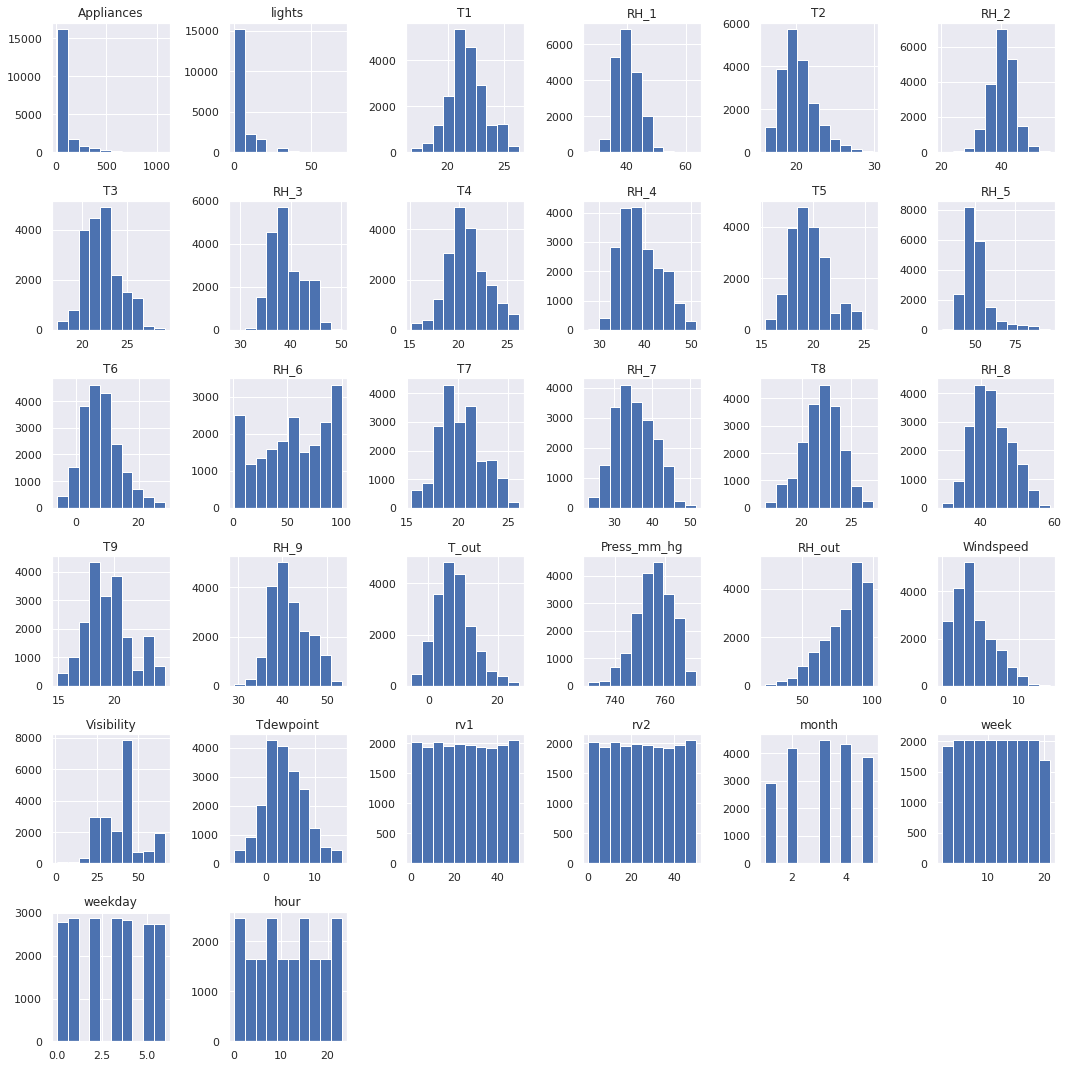

In [ ]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(data=df,ax=ax)
plt.tight_layout()

above plot is histogram, is a chart that plots the distribution of a numeric variable's values as a series of bars

IndexError: ignored

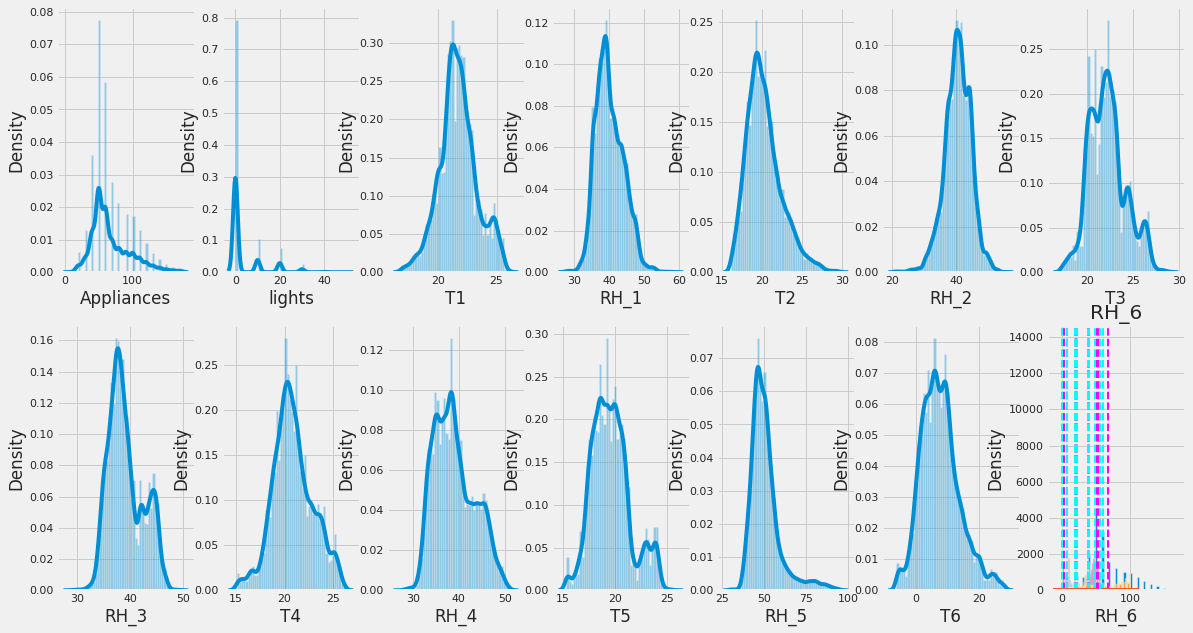

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(18, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    ax=sns.distplot(v, ax=axs[index])    
    index += 1
    ax = fig.gca()
    feature = df[k]
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    feature.hist(bins=50, ax = ax)  
    ax.set_title(k)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

above code gives description about the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

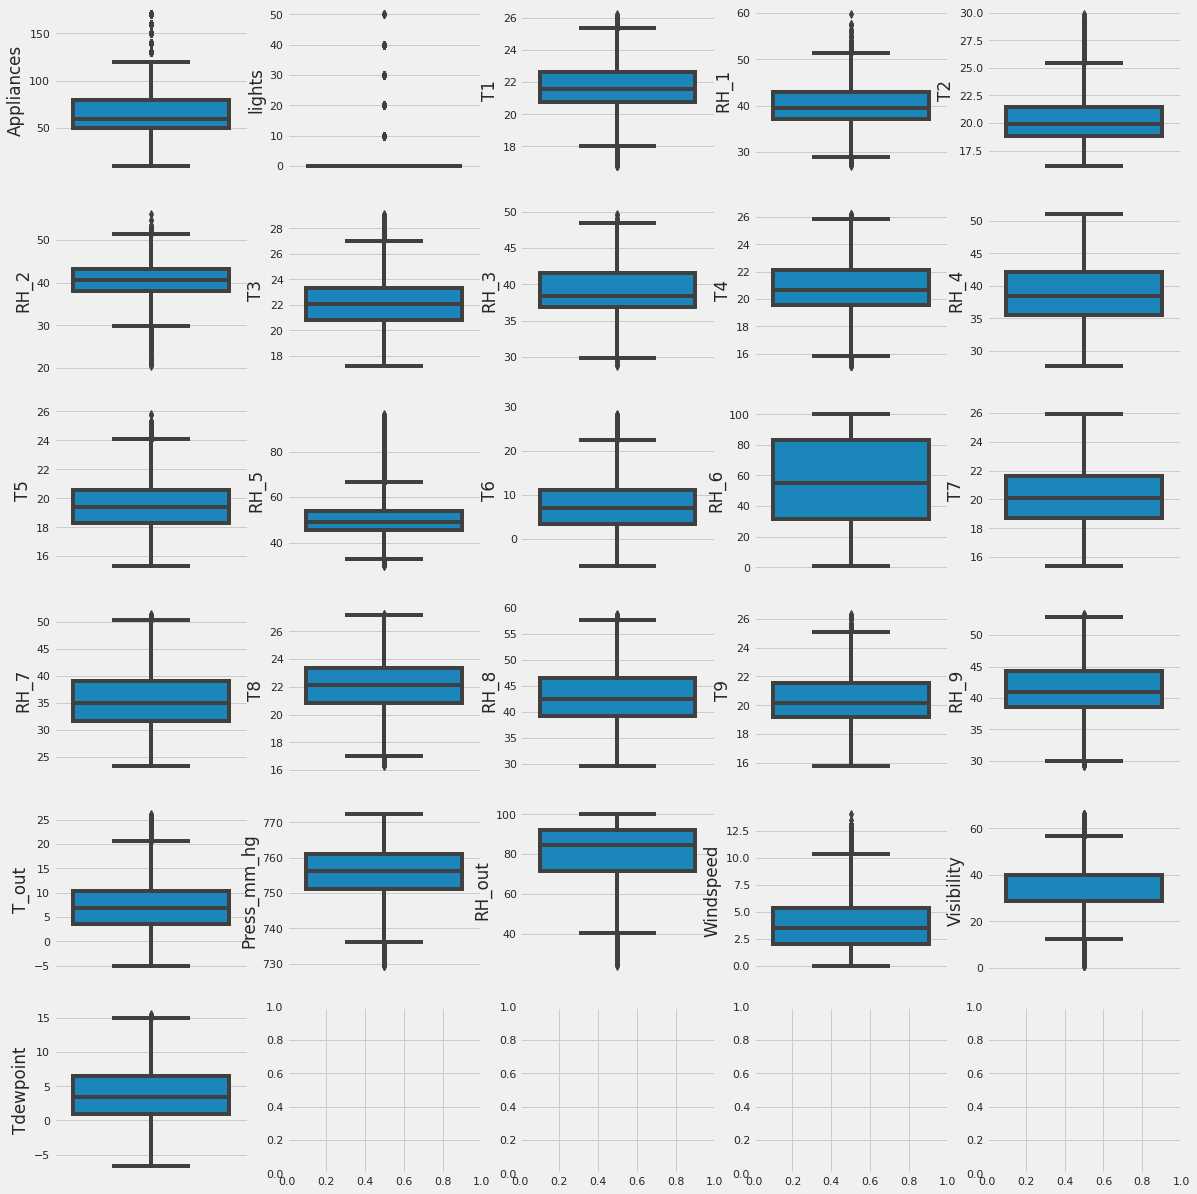

In [ ]:
#This is Boxplot for every column for checking the Qutliers 

ls = []
colName = [j for j in df.columns]
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(18, 20))
for k in range(26):
    sns.boxplot(ax=ax[ls[k][0], ls[k][1]], y=colName[k], data=df)

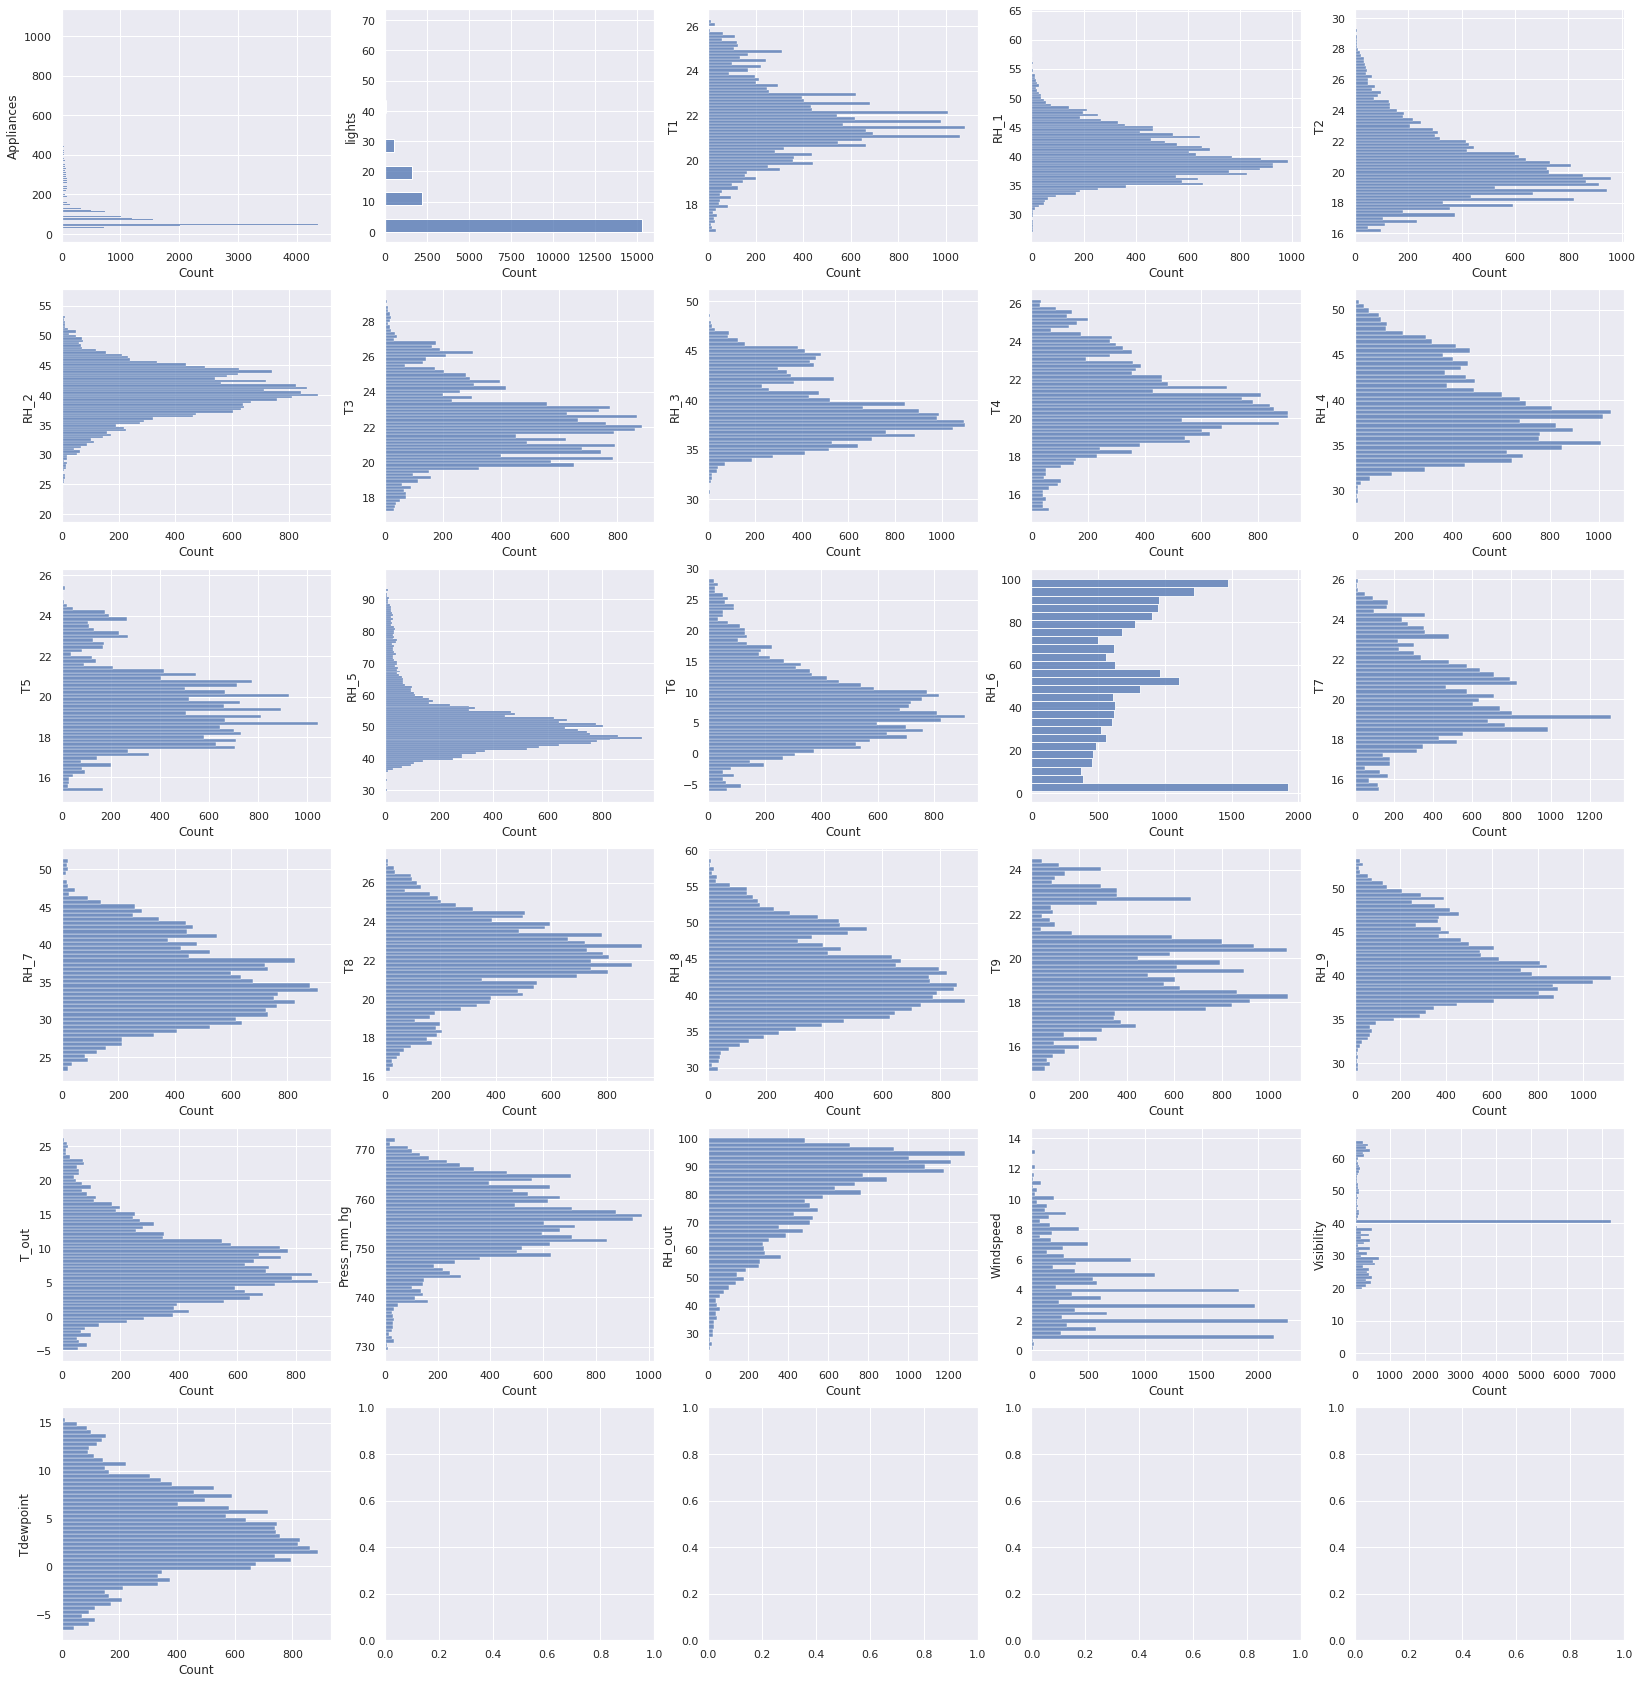

In [ ]:
# Delect this beacuase already ploted above

ls = []
colName = [j for j in df.columns]
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.histplot(ax=ax[ls[k][0], ls[k][1]], y=colName[k],data=df)

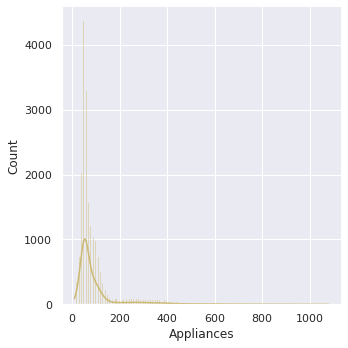

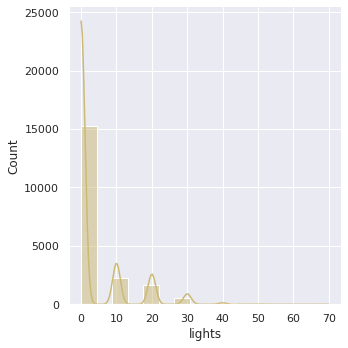

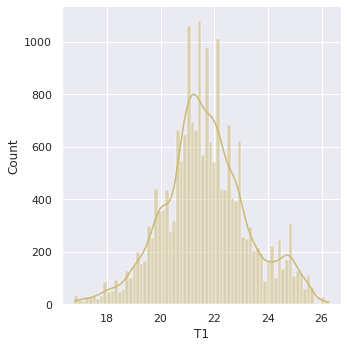

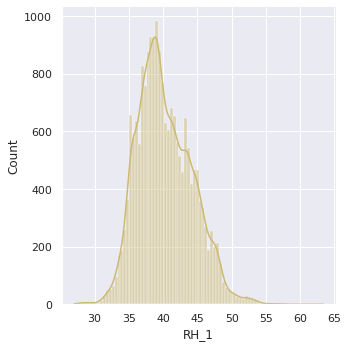

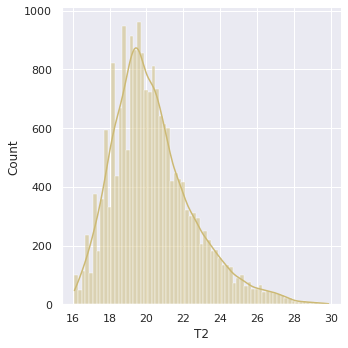

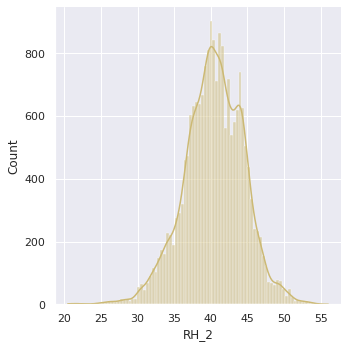

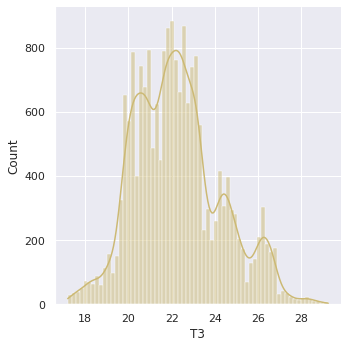

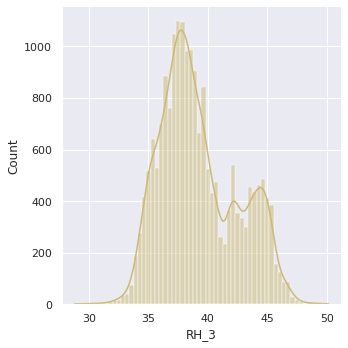

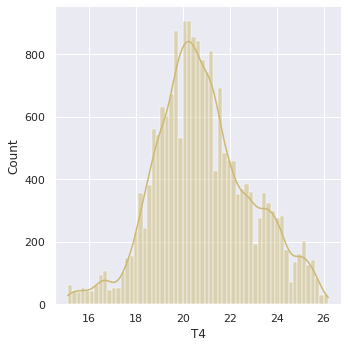

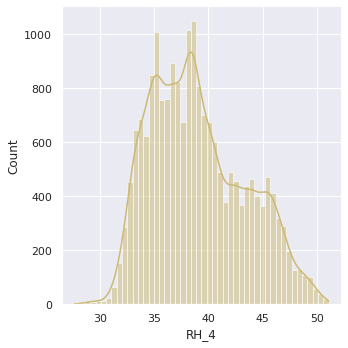

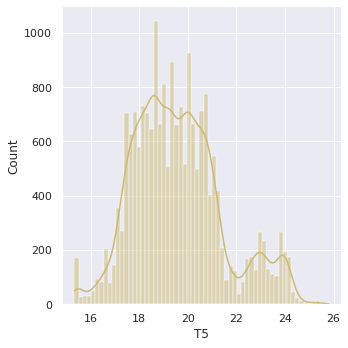

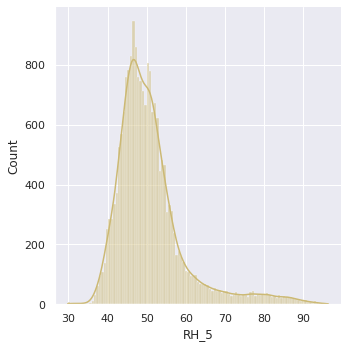

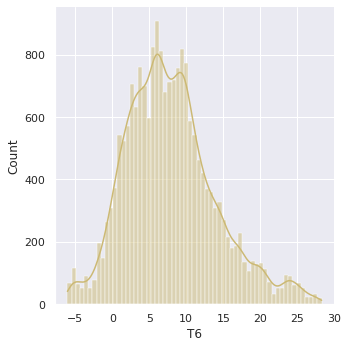

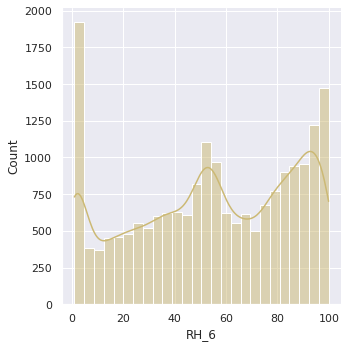

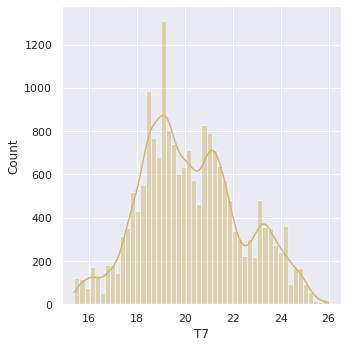

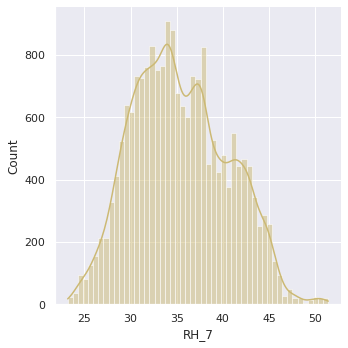

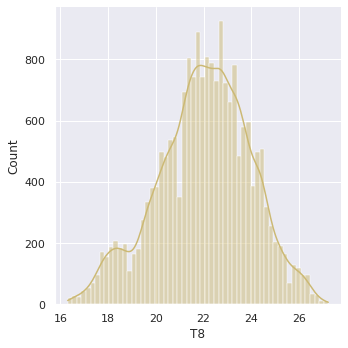

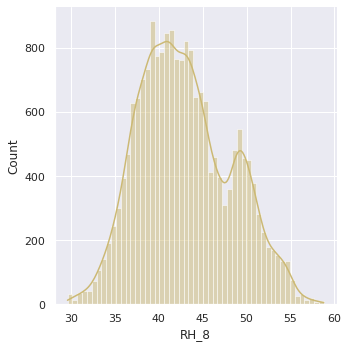

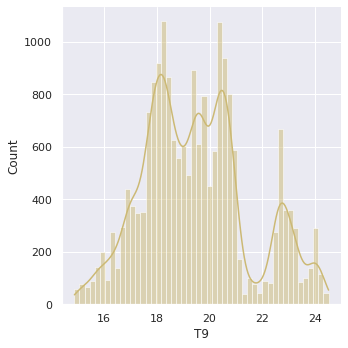

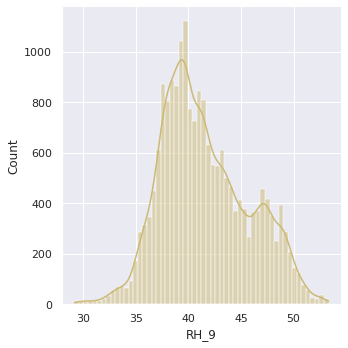

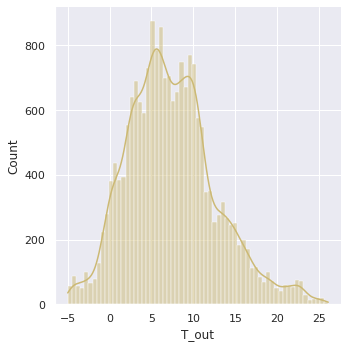

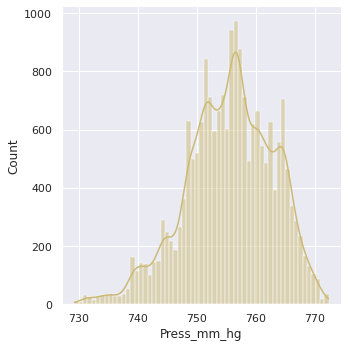

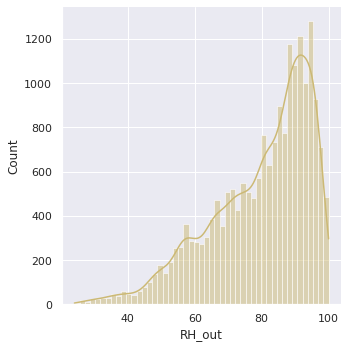

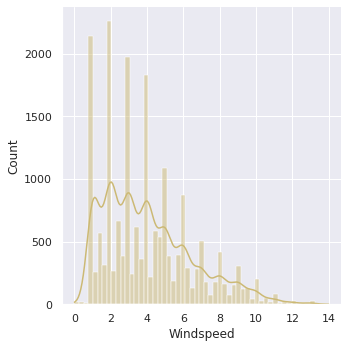

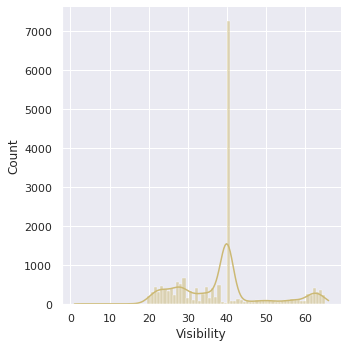

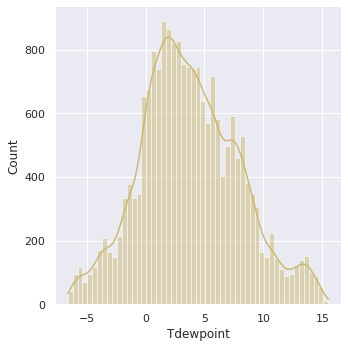

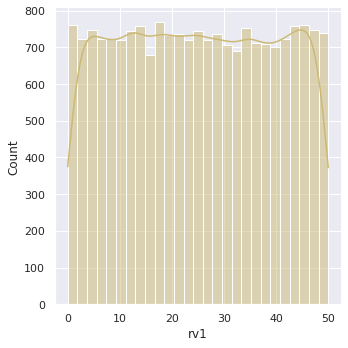

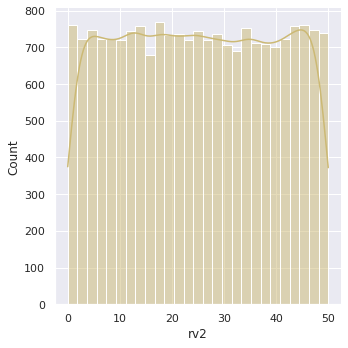

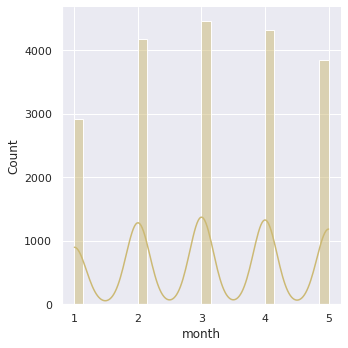

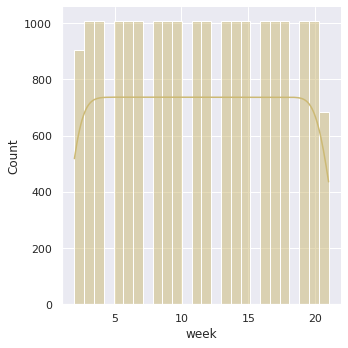

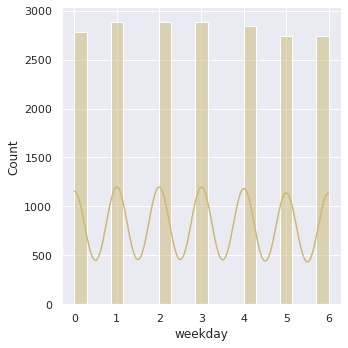

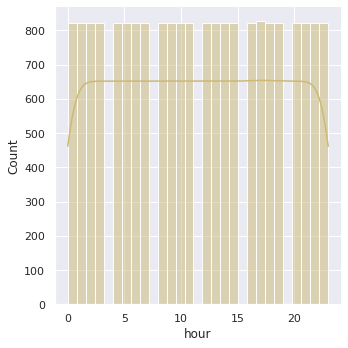

In [ ]:
# This is Distplot with kde=true

for col_name in df.columns:
    if df[col_name].dtype == 'int' or df[col_name].dtype == 'float':
        sns.displot(df[col_name], kde=True, color='y')
        plt.xlabel(col_name)
        plt.show()

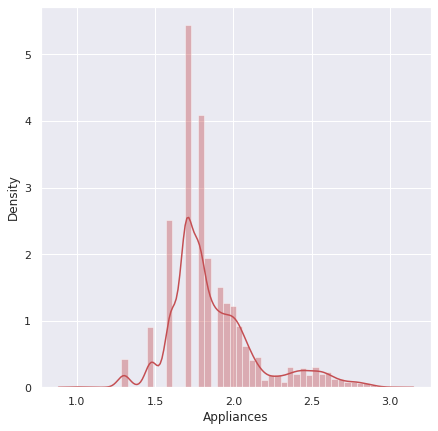

In [ ]:
#Target Variable distplot

plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['Appliances']),color="r")

In [ ]:
x=df[['Appliances']]
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
print("Outlier threshold of Appliances ",IQR)
dfOutlier=x.describe()
outlierSet=set()
for column in dfOutlier.columns:
    Q1 = dfOutlier[column]['25%']
    Q3 = dfOutlier[column]['75%']
    IQR = Q3 - Q1
    outlierDf= ( ((x[column] < (Q1 - 1.5 * IQR)) |(x[column] > (Q3 + 1.5 * IQR))) )
    outlierSet.update(set(outlierDf[outlierDf==True].index))
df.drop(outlierSet, inplace=True, axis=0)

Outlier threshold of Appliances  Appliances    50.0
dtype: float64


The number of the 0,1% top values of appliances' load is 17 and they have power load higher than 170 Wh.


Text(0.5, 1.0, 'Appliances consumption distribution')

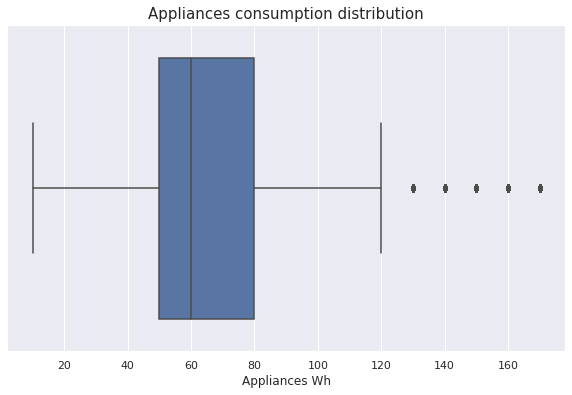

In [ ]:
# Find outliers
sorted_appliances = df.sort_values('Appliances',ascending=False)
print("The number of the 0,1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
      sorted_appliances.Appliances[19], "Wh.")

# boxplot appliances
plt.figure(figsize=(10,6))
sns.boxplot(x="Appliances", data=df)
plt.xlabel('Appliances Wh', fontsize=12)
plt.title("Appliances consumption distribution", fontsize=15)

In [ ]:
Q1 = np.percentile(df['Appliances'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df['Appliances'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df['Appliances'], 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given Appliances is, ', Q1)
print('Q1 50 percentile of the given Appliances is, ', Q2)
print('Q1 75 percentile of the given Appliances is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given Appliances is,  50.0
Q1 50 percentile of the given Appliances is,  60.0
Q1 75 percentile of the given Appliances is,  80.0
Interquartile range is 30.0


In [ ]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 5.0
up_limit is 125.0


the above method is usse for calculating the IQR value for removing the Outliers from the target variable 

In [ ]:

# Functions to be used from the plots

def daily(x,df=df):
    return df.groupby('weekday')[x].mean()
def hourly(x,df=df):
    return df.groupby('hour')[x].mean()
def monthly_daily(x,df=df):
    by_day = df.pivot_table(index='weekday', 
                                columns=['month'],
                                values=x,
                                aggfunc='mean')
    return round(by_day, ndigits=2)

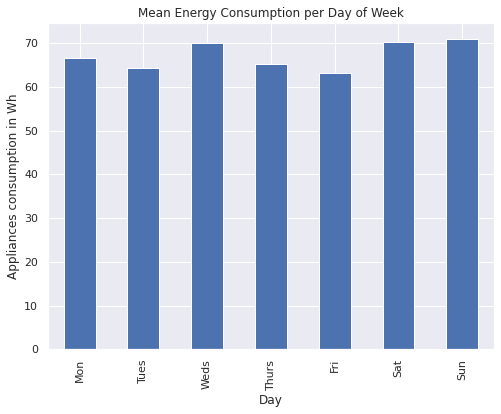

In [ ]:

# Plot of Mean Energy Consumption per Day of Week


daily('Appliances').plot(kind = 'bar', figsize=(8,6))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per Day of Week')
plt.xticks(ticks, labels);

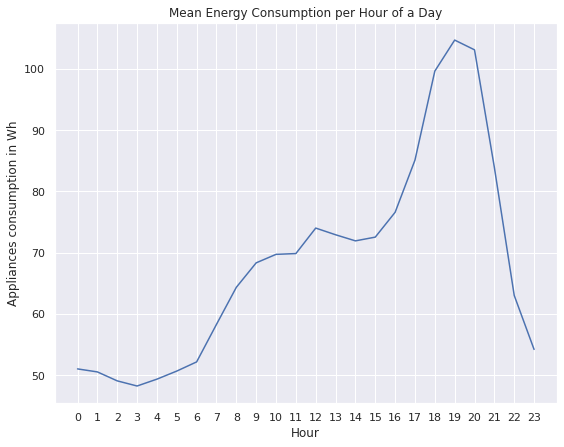

In [ ]:

# Plot of Mean Energy Consumption per Hour of a Day

hourly('Appliances').plot(figsize=(9,7))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

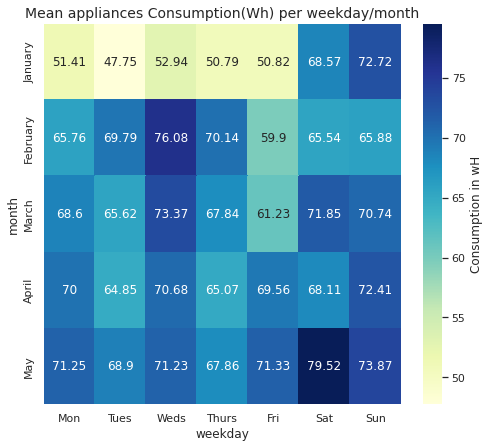

In [ ]:

# Heatmap: Mean consumption per Weekday of Month

sns.set(rc={'figure.figsize':(8,7)},)
ax=sns.heatmap(monthly_daily('Appliances').T,cmap="YlGnBu",
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(),
               yticklabels="January February March April May".split(),
               annot=True, fmt='g',
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean appliances Consumption(Wh) per weekday/month").set_fontsize('14')

plt.show()

# Correlation Matrix , HeatMap,Regplot 

In [ ]:
numeric_features = df.describe().columns

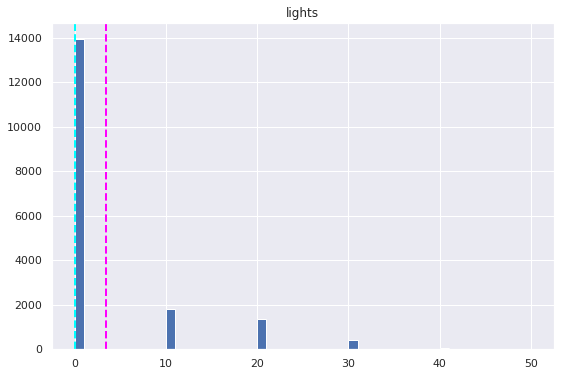

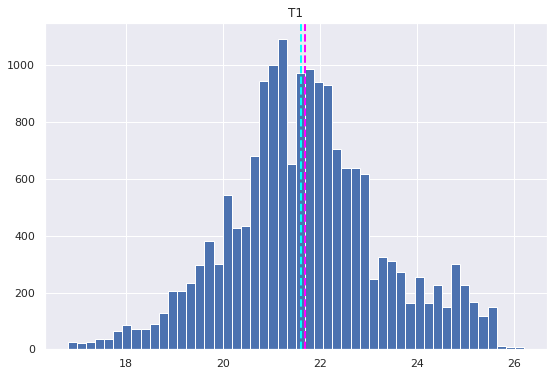

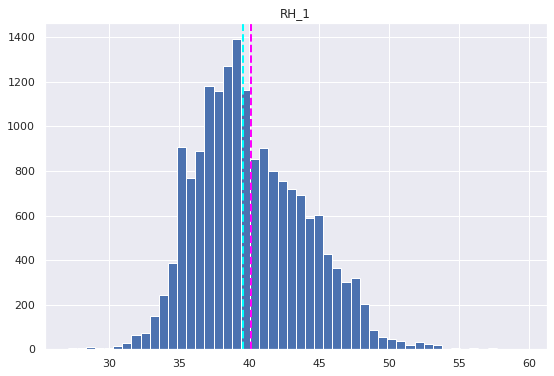

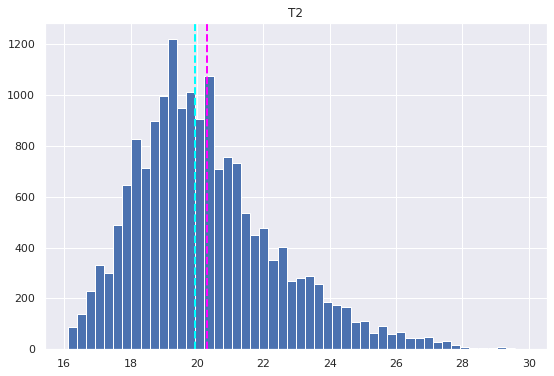

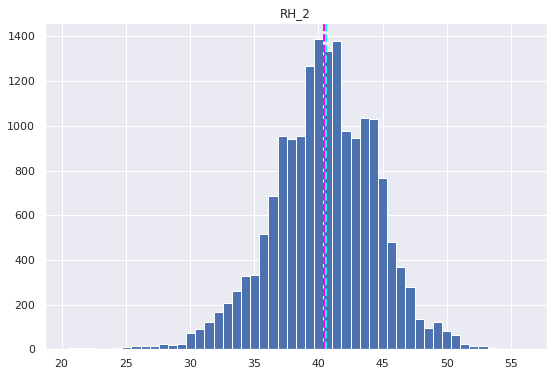

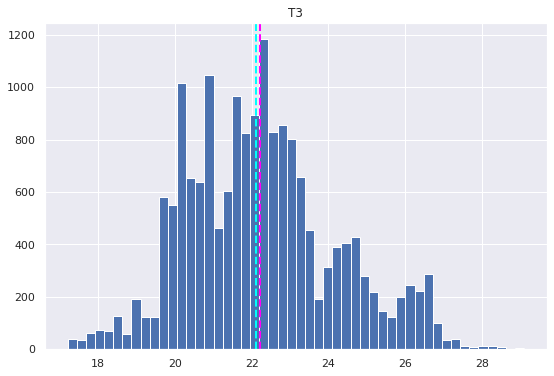

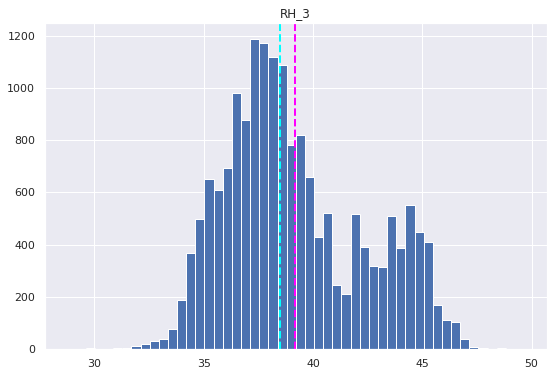

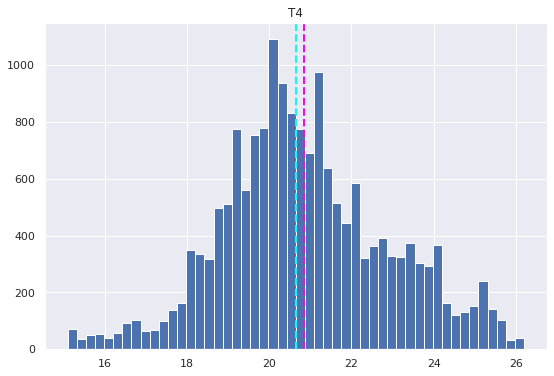

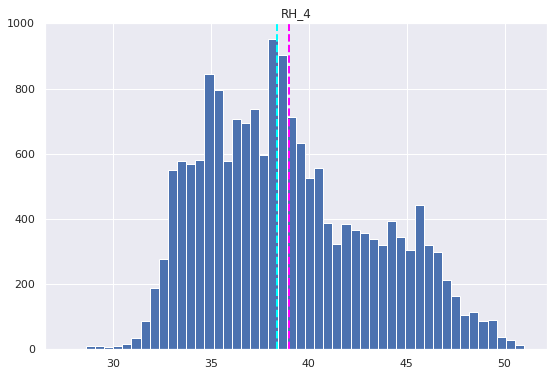

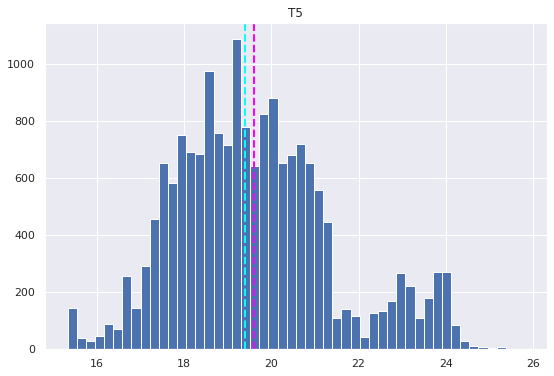

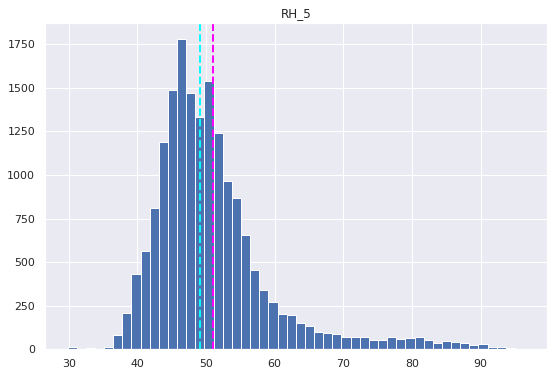

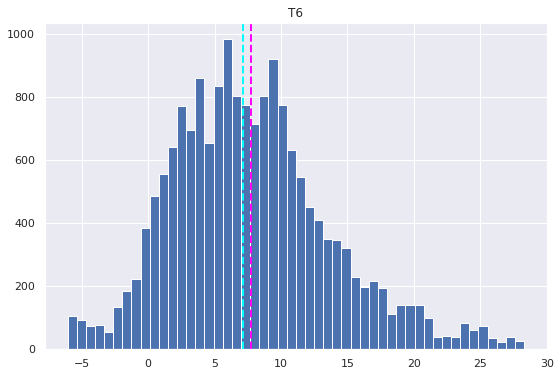

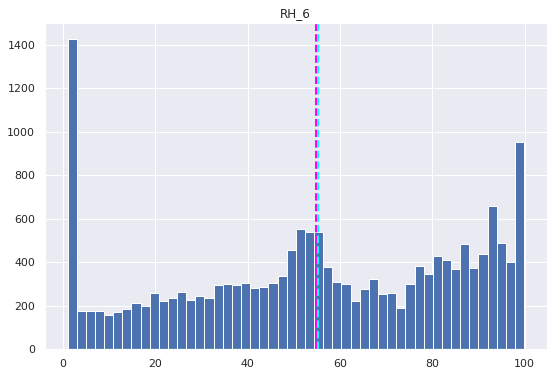

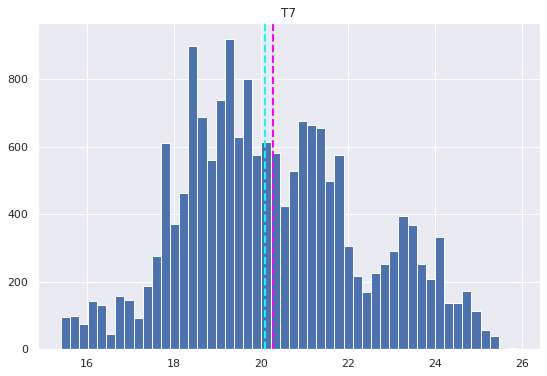

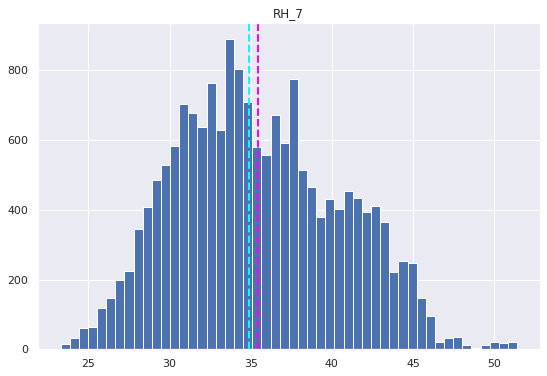

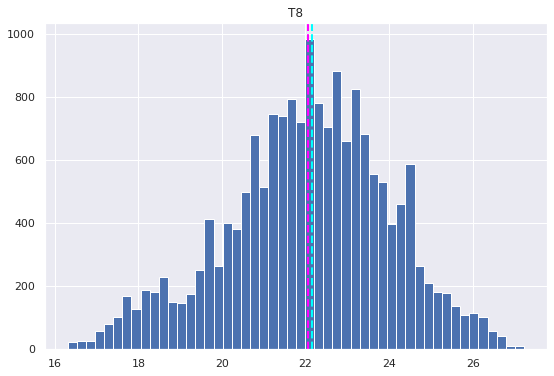

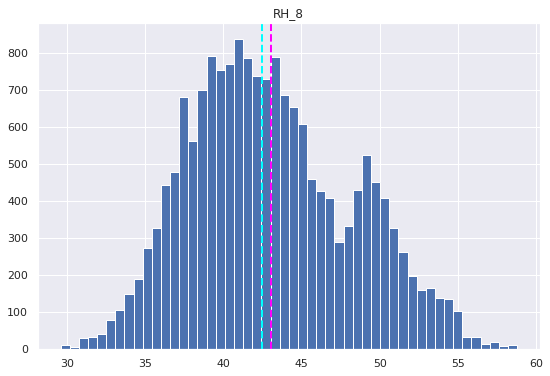

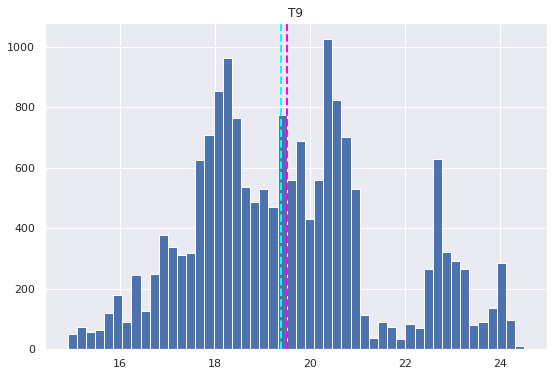

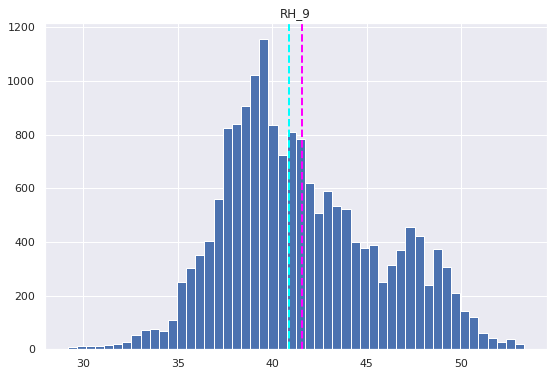

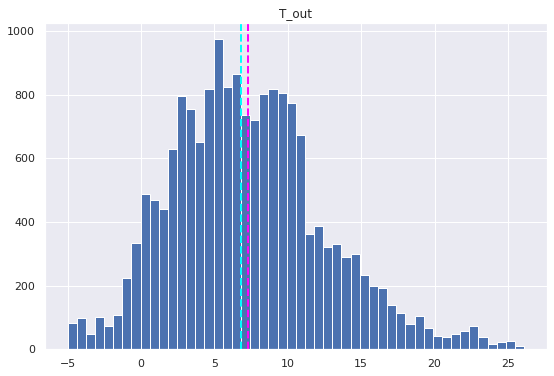

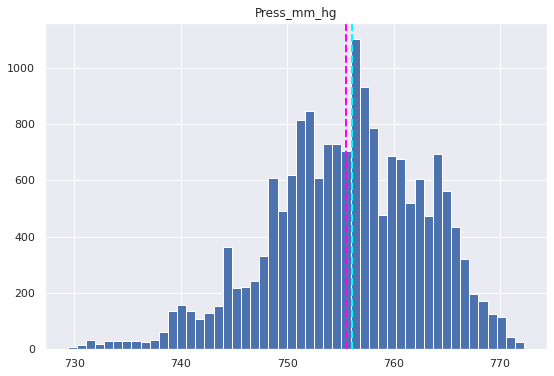

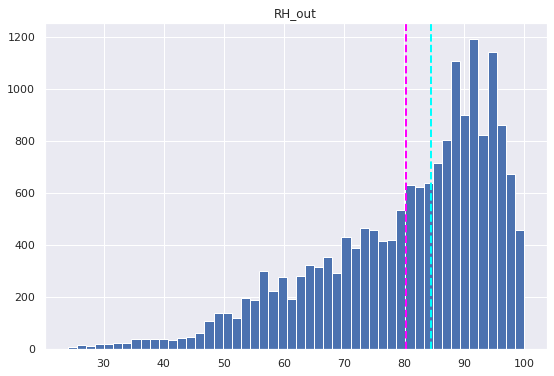

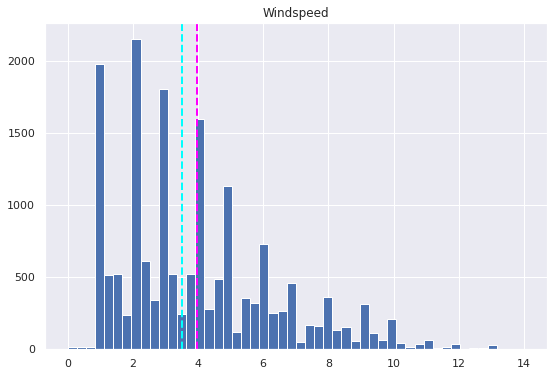

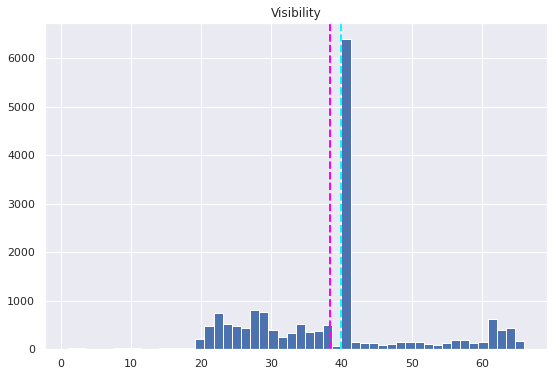

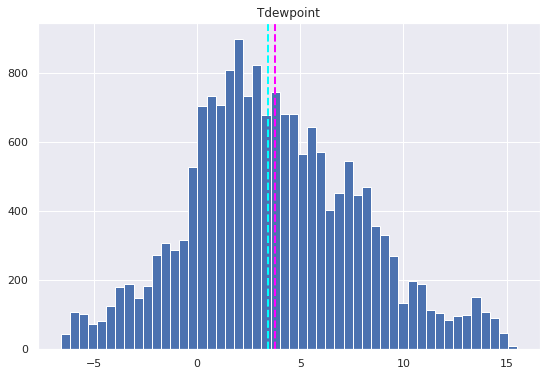

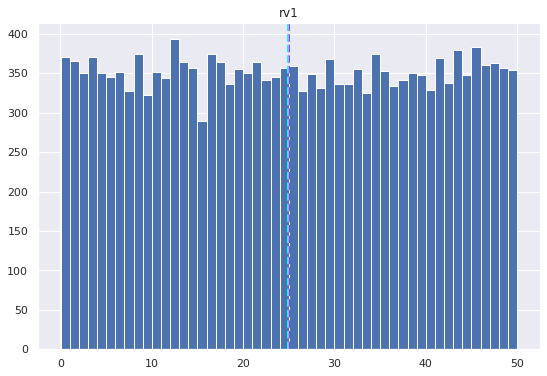

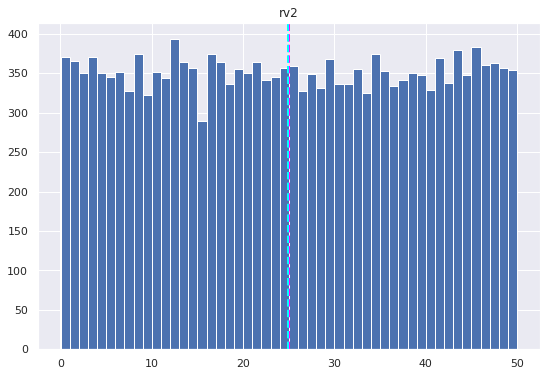

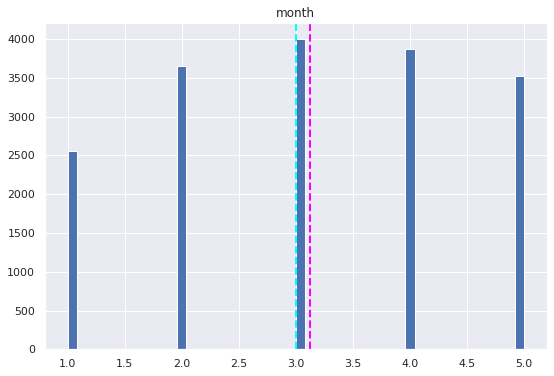

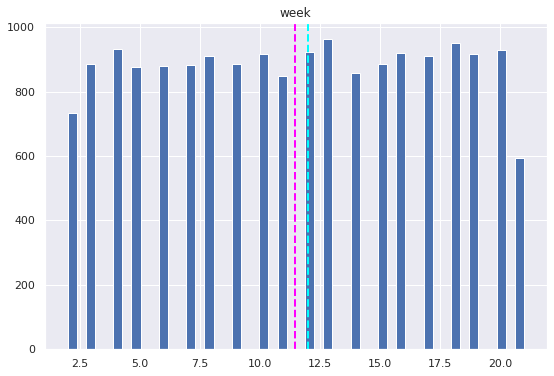

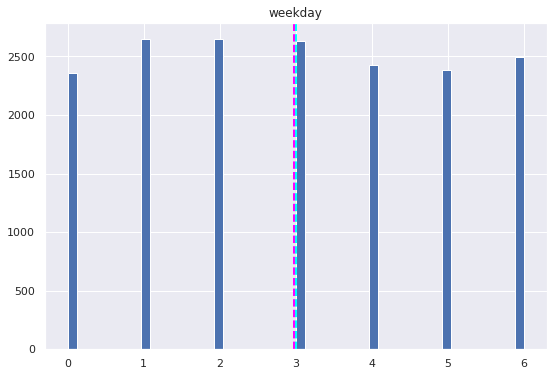

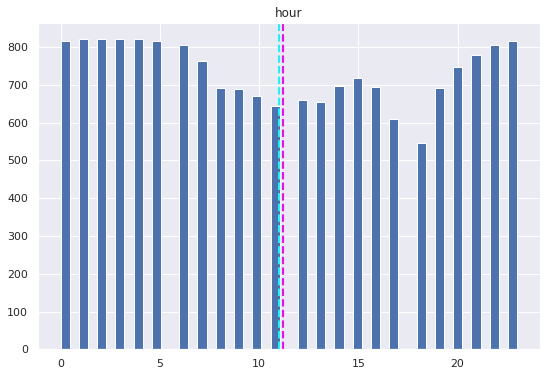

In [ ]:

#This plot give the hisplot of each column with mean and meadian 

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)   
    ax.set_title(col)
plt.show()

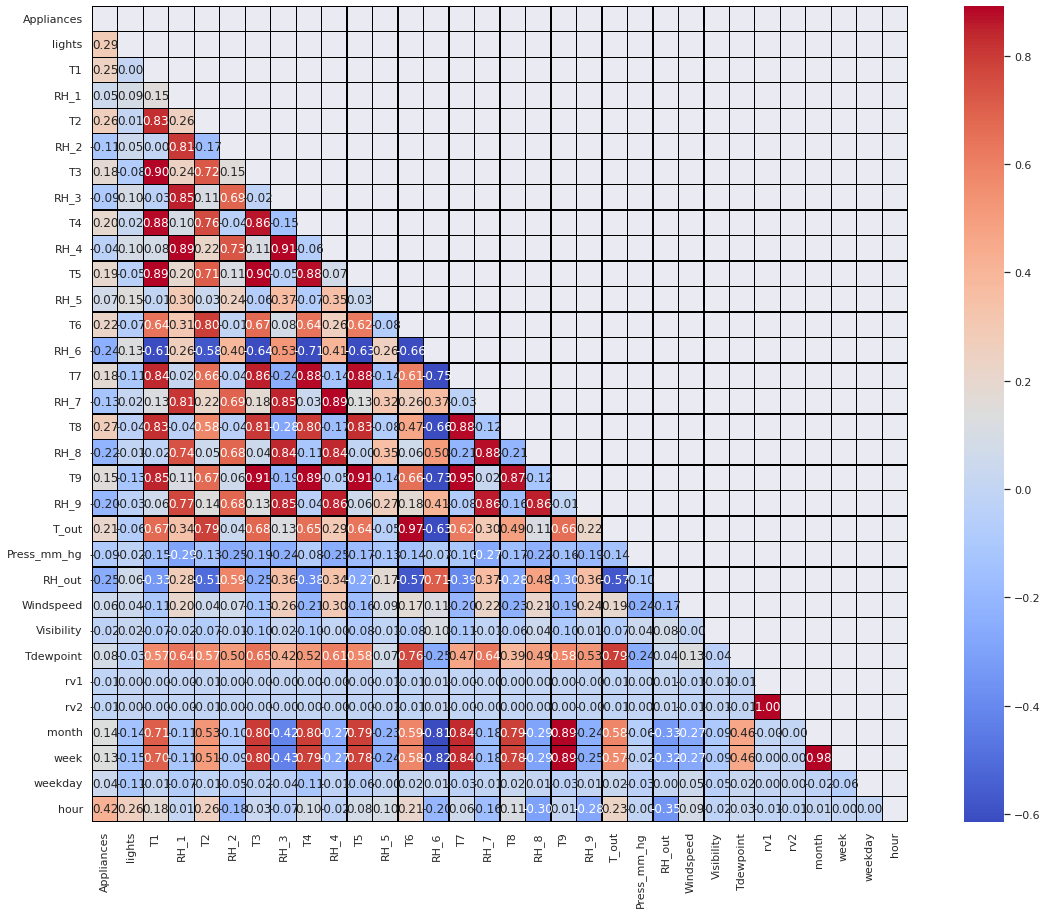

In [ ]:
#Correlation between different variables
corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20,15))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, cbar = True,square = True, fmt = '.2f',mask = mask, cmap='coolwarm',linecolor='black',linewidths=.3,robust=True)

In [ ]:
# the correalation in the table formate
df.corr() 

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,week,weekday,hour
Appliances,1.000000,0.291109,0.248221,0.045596,0.264739,-0.109746,0.180061,-0.088410,0.195689,-0.036932,0.191782,0.072040,0.223875,-0.240142,0.175519,-0.128740,0.268293,-0.218639,0.154471,-0.201968,0.213651,-0.089829,-0.252696,0.055363,-0.024974,0.081550,-0.009986,-0.009986,0.136764,0.133495,0.044500,0.416503
lights,0.291109,1.000000,0.004010,0.092590,0.008797,0.046933,-0.077504,0.096347,0.015649,0.096474,-0.048351,0.147470,-0.067065,0.126994,-0.106438,0.019318,-0.036380,-0.007406,-0.125616,-0.034845,-0.063359,-0.023170,0.063889,0.040883,0.020630,-0.026205,0.004888,0.004888,-0.140497,-0.147540,-0.108016,0.258131
T1,0.248221,0.004010,1.000000,0.153799,0.831967,0.000171,0.897053,-0.032224,0.881085,0.081965,0.887043,-0.007641,0.641951,-0.612654,0.841789,0.125281,0.832588,-0.018747,0.847975,0.060026,0.670593,-0.152247,-0.332730,-0.107067,-0.070405,0.565168,-0.002757,-0.002757,0.709299,0.698495,-0.005254,0.180641
RH_1,0.045596,0.092590,0.153799,1.000000,0.256932,0.806895,0.243415,0.854656,0.096399,0.890015,0.196578,0.303219,0.312278,0.263890,0.020827,0.811149,-0.037339,0.742213,0.111263,0.770466,0.339477,-0.288807,0.284023,0.203744,-0.023531,0.642200,-0.002381,-0.002381,-0.105671,-0.109471,-0.067276,0.011019
T2,0.264739,0.008797,0.831967,0.256932,1.000000,-0.169432,0.724341,0.114784,0.758124,0.218405,0.713467,0.033758,0.797236,-0.577852,0.658937,0.218668,0.577031,0.052209,0.670428,0.143615,0.787394,-0.133023,-0.508107,0.044776,-0.069210,0.573864,-0.006851,-0.006851,0.529425,0.507729,-0.011122,0.261239
RH_2,-0.109746,0.046933,0.000171,0.806895,-0.169432,1.000000,0.151695,0.689152,-0.044259,0.727150,0.110604,0.241353,-0.008103,0.396348,-0.040744,0.693858,-0.038205,0.681128,0.060387,0.680480,0.038352,-0.251208,0.588761,0.067110,-0.005777,0.504801,0.002199,0.002199,-0.099637,-0.087892,-0.053356,-0.183310
T3,0.180061,-0.077504,0.897053,0.243415,0.724341,0.151695,1.000000,-0.018452,0.862704,0.113369,0.899945,-0.062262,0.668204,-0.637781,0.855851,0.175432,0.807573,0.044596,0.912793,0.130937,0.684701,-0.192824,-0.251120,-0.128159,-0.097455,0.648264,-0.001382,-0.001382,0.800529,0.803061,-0.023969,0.031799
RH_3,-0.088410,0.096347,-0.032224,0.854656,0.114784,0.689152,-0.018452,1.000000,-0.148553,0.910038,-0.053136,0.373687,0.081692,0.526241,-0.244132,0.845370,-0.278456,0.840604,-0.190658,0.845196,0.125947,-0.237246,0.357759,0.263632,0.017537,0.421794,-0.003149,-0.003149,-0.416857,-0.431477,-0.040827,-0.066265
T4,0.195689,0.015649,0.881085,0.096399,0.758124,-0.044259,0.862704,-0.148553,1.000000,-0.062208,0.877143,-0.073263,0.643408,-0.705368,0.882037,0.034278,0.801918,-0.110301,0.892299,-0.039221,0.654619,-0.076398,-0.378222,-0.205010,-0.097992,0.516391,0.001220,0.001220,0.795115,0.791035,-0.110183,0.096707
RH_4,-0.036932,0.096474,0.081965,0.890015,0.218405,0.727150,0.113369,0.910038,-0.062208,1.000000,0.073212,0.349692,0.257341,0.406854,-0.135003,0.891678,-0.172805,0.842411,-0.050797,0.855029,0.292575,-0.246577,0.335375,0.301535,-0.000155,0.611988,-0.004286,-0.004286,-0.270474,-0.272799,-0.014699,-0.021562


From the above heatmap we can see data have more multicollinearity between column for applying the M.L. we have to remove it................

In [ ]:

#Correaltion Matrix with Dependent Varaible

corr_matrix = df.corr(method='pearson')
matrix=corr_matrix["Appliances"].sort_values(ascending=False)
print((matrix))

Appliances     1.000000
hour           0.416503
lights         0.291109
T8             0.268293
T2             0.264739
T1             0.248221
T6             0.223875
T_out          0.213651
T4             0.195689
T5             0.191782
T3             0.180061
T7             0.175519
T9             0.154471
month          0.136764
week           0.133495
Tdewpoint      0.081550
RH_5           0.072040
Windspeed      0.055363
RH_1           0.045596
weekday        0.044500
rv1           -0.009986
rv2           -0.009986
Visibility    -0.024974
RH_4          -0.036932
RH_3          -0.088410
Press_mm_hg   -0.089829
RH_2          -0.109746
RH_7          -0.128740
RH_9          -0.201968
RH_8          -0.218639
RH_6          -0.240142
RH_out        -0.252696
Name: Appliances, dtype: float64


Above matrix is for,, correlation matrix is simply a table showing the correlation coefficients between variables

Correlation,Scatter plot for rest of features

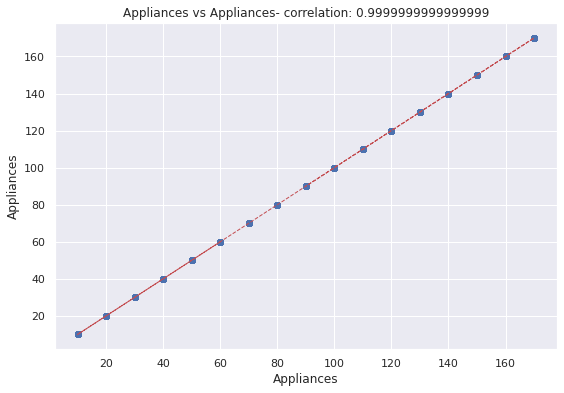

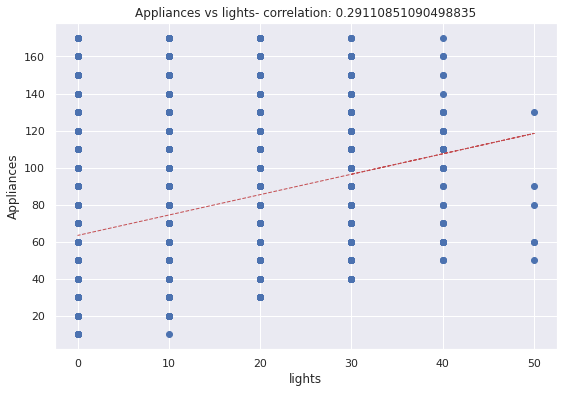

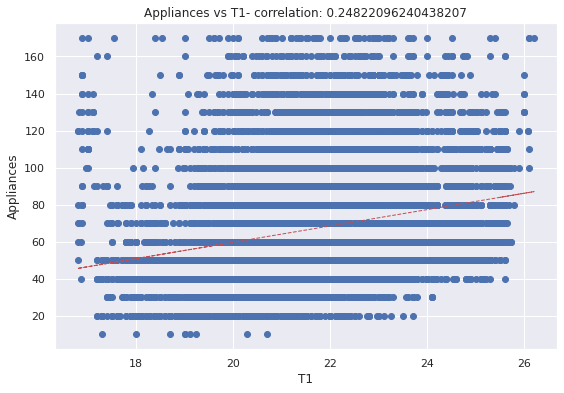

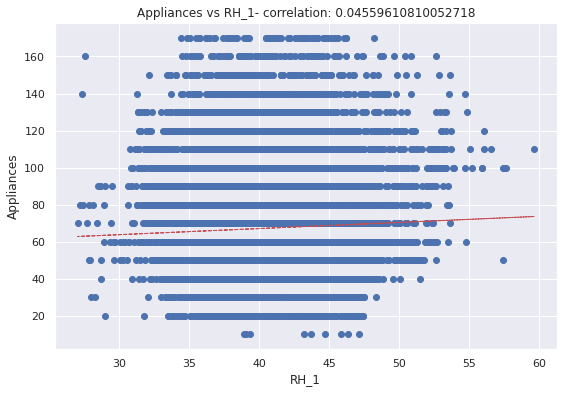

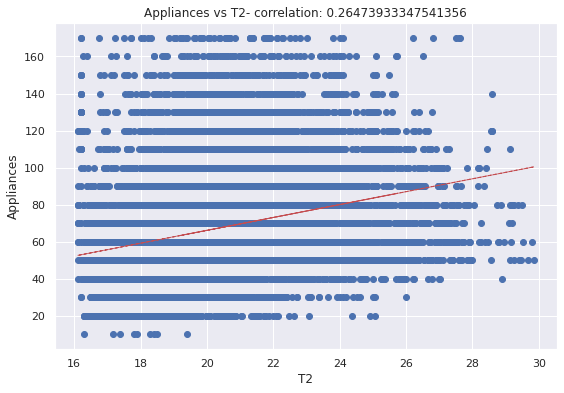

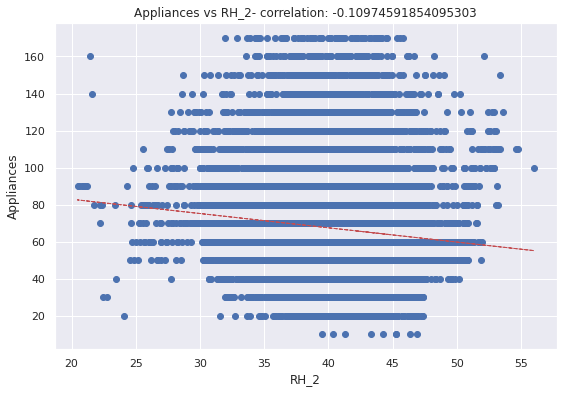

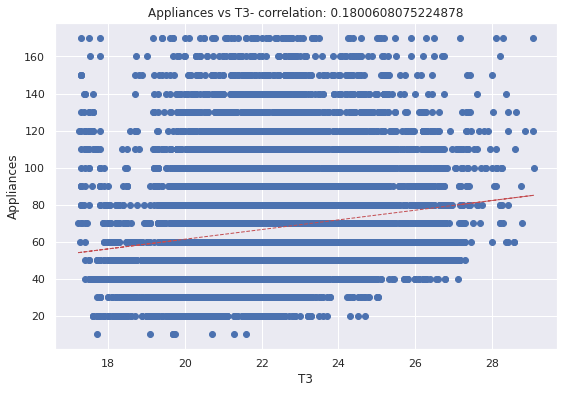

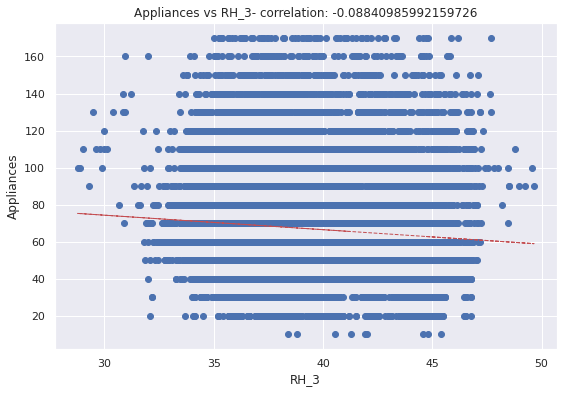

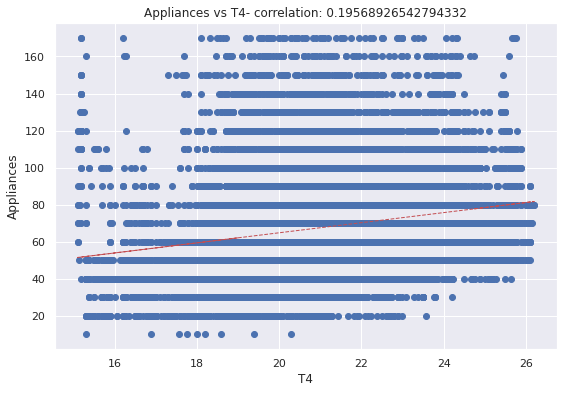

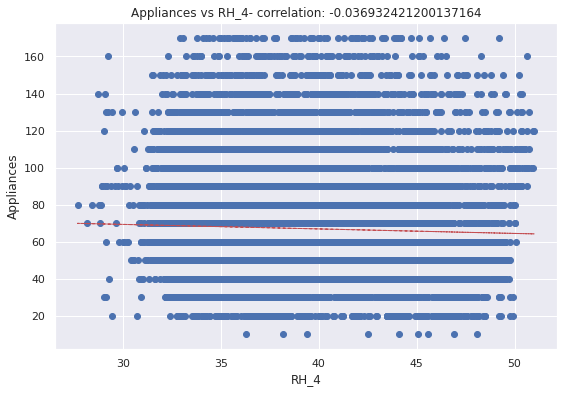

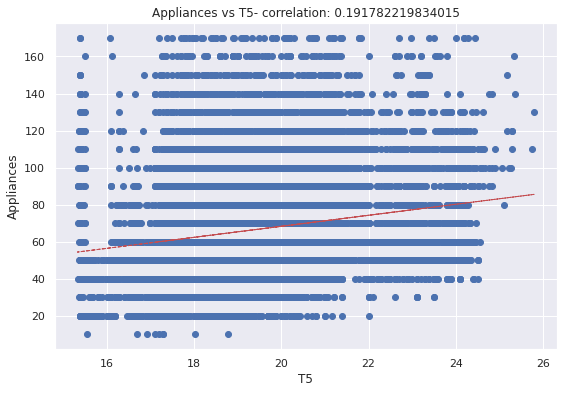

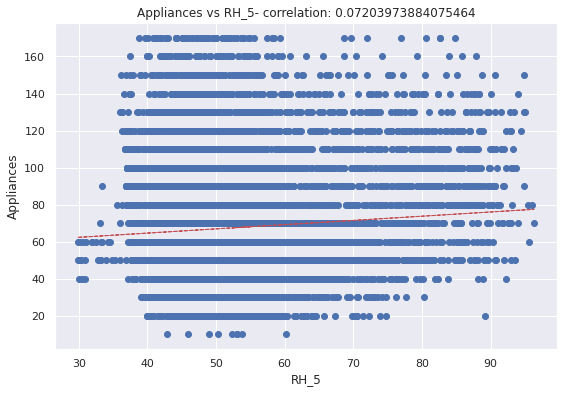

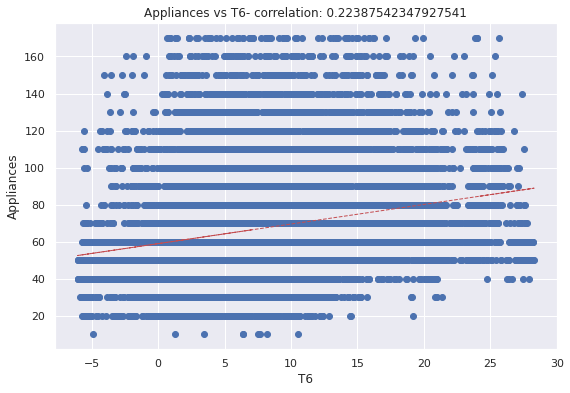

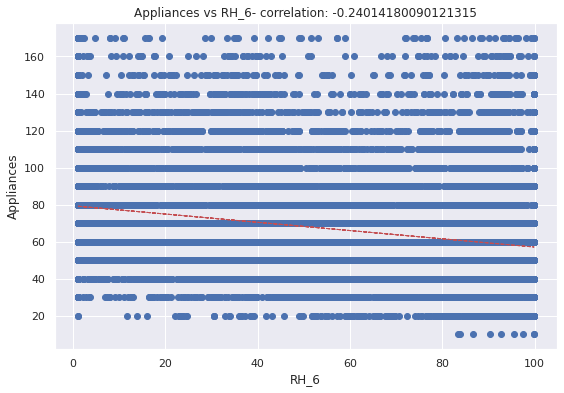

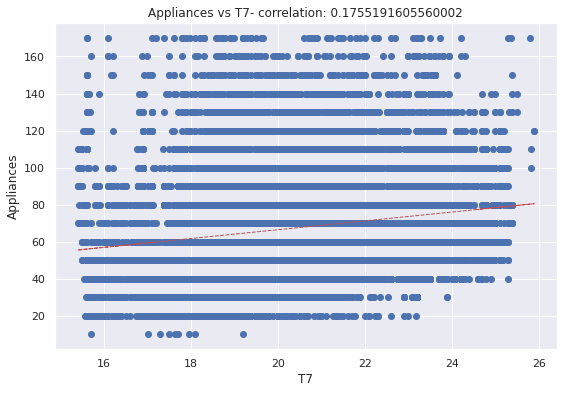

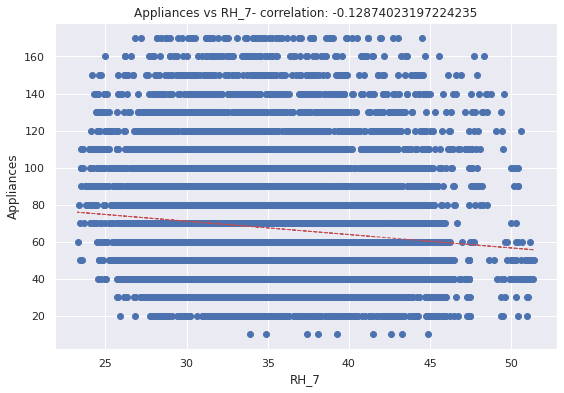

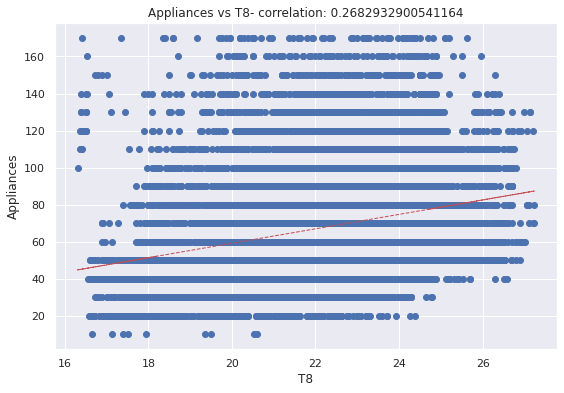

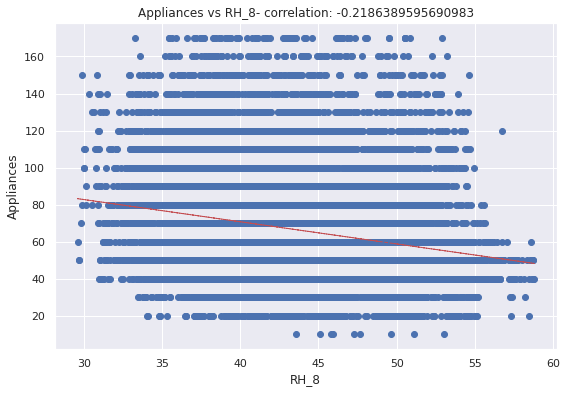

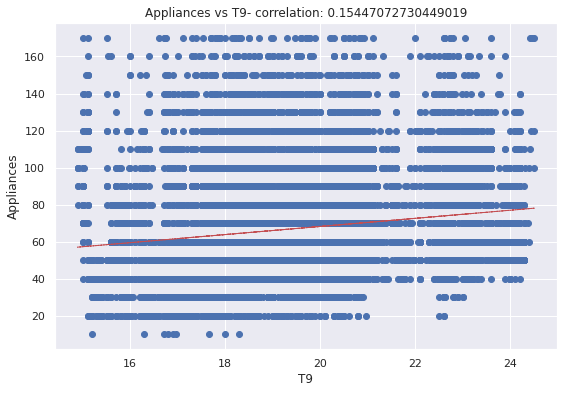

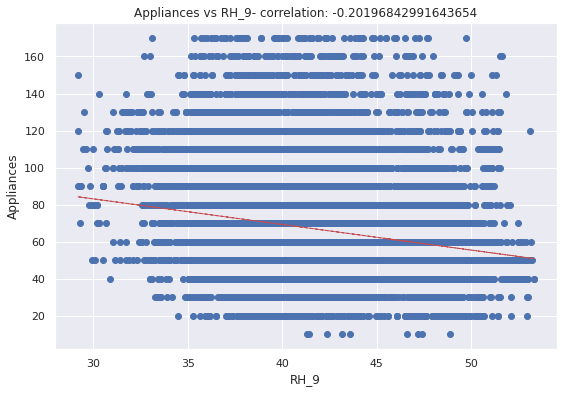

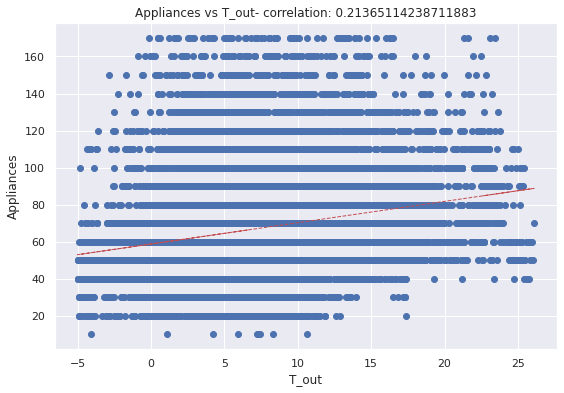

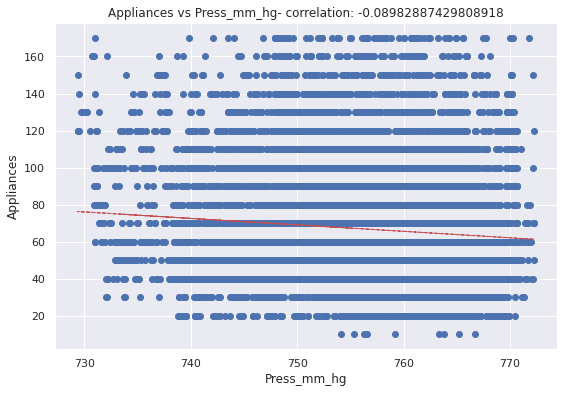

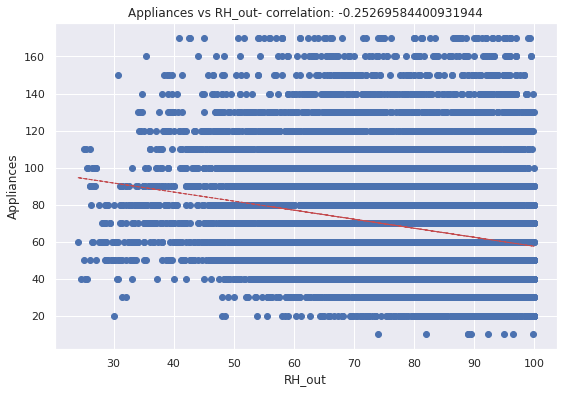

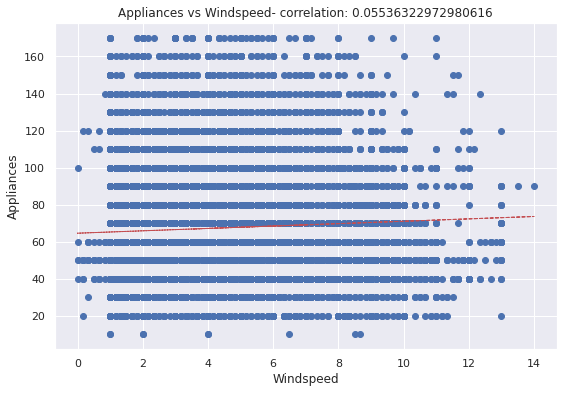

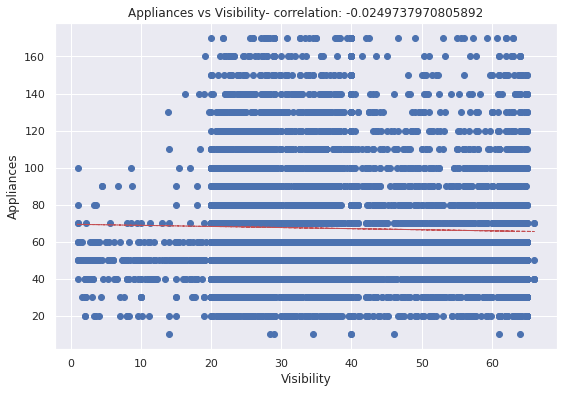

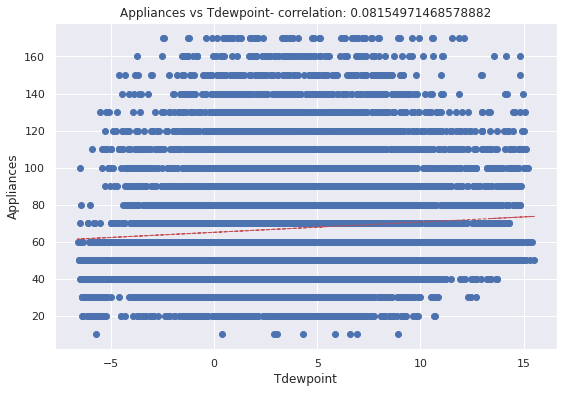

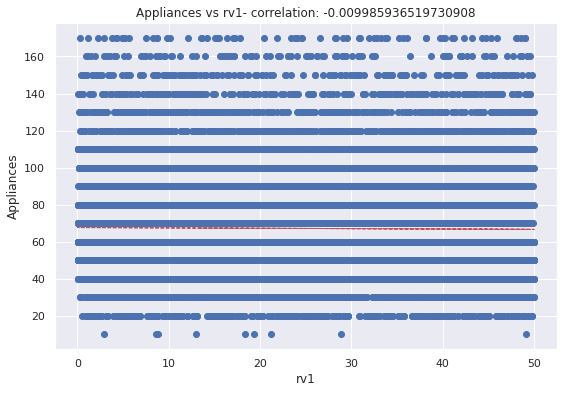

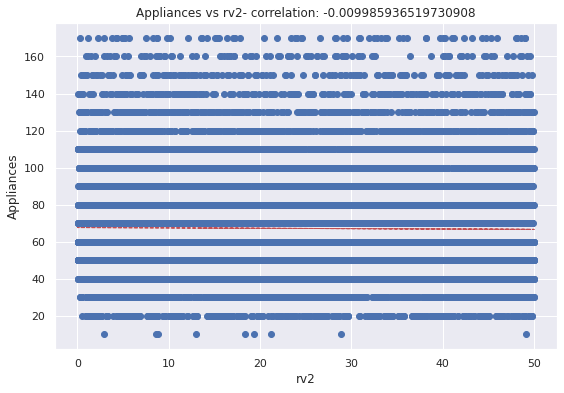

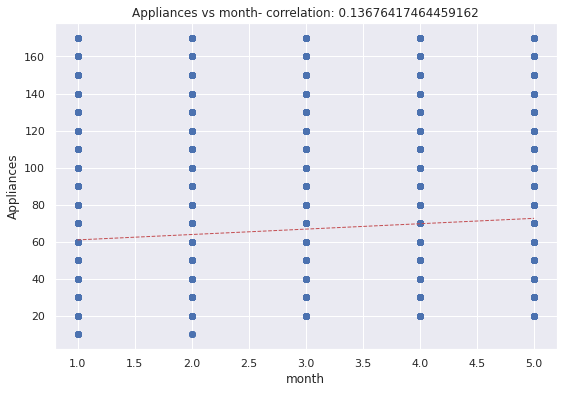

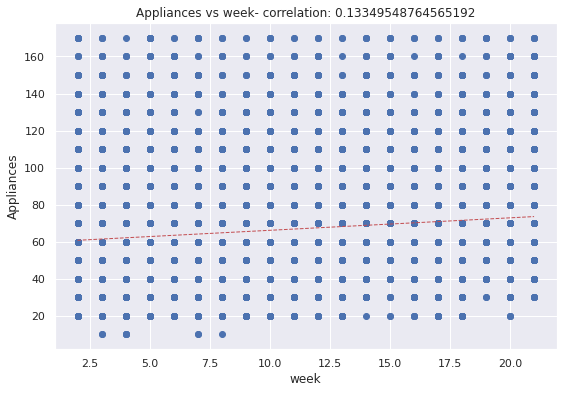

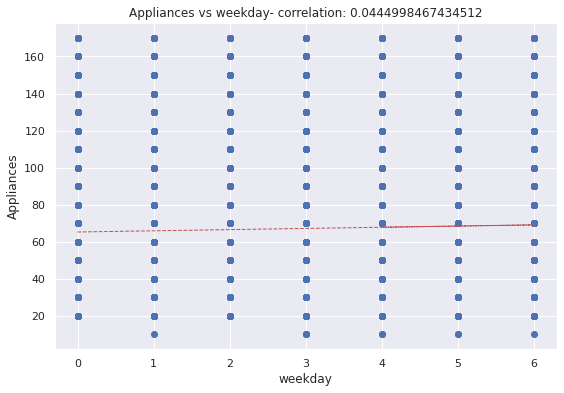

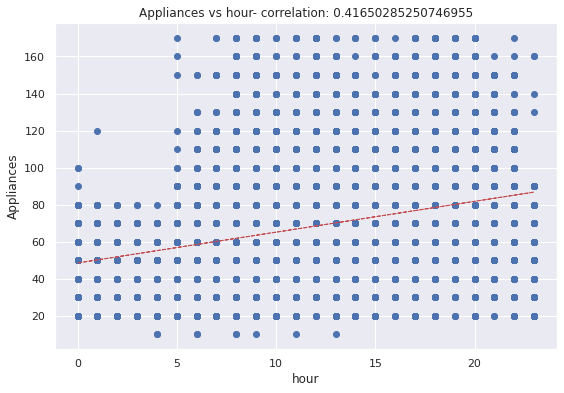

In [ ]:
for col in df:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Appliances'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# Checeking for Multicollinearity

This Function give the table form of the heatmap

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 40))

Top Absolute Correlations
rv1    rv2      1.000000
month  week     0.977043
T6     T_out    0.974053
T7     T9       0.946417
T5     T9       0.913660
T3     T9       0.912793
RH_3   RH_4     0.910038
T3     T5       0.899945
T1     T3       0.897053
T4     T9       0.892299
RH_4   RH_7     0.891678
RH_1   RH_4     0.890015
T9     month    0.889265
       week     0.888428
T1     T5       0.887043
T7     T8       0.883437
T4     T7       0.882037
T1     T4       0.881085
T5     T7       0.877342
T4     T5       0.877143
RH_7   RH_8     0.876809
T8     T9       0.869282
T3     T4       0.862704
RH_7   RH_9     0.858536
RH_8   RH_9     0.856356
T3     T7       0.855851
RH_4   RH_9     0.855029
RH_1   RH_3     0.854656
T1     T9       0.847975
RH_3   RH_7     0.845370
       RH_9     0.845196
RH_4   RH_8     0.842411
T1     T7       0.841789
RH_3   RH_8     0.840604
T7     week     0.837422
       month    0.835251
T1     T8       0.832588
T5     T8       0.831978
T1     T2       0.831967

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
considered_features1 = df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'month', 'week', 'weekday', 'hour']]

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = considered_features1.columns
vif_data["VIF"] = [variance_inflation_factor(considered_features1.values, i)
for i in range(len(considered_features1.columns))]

In [ ]:
vif_data

,feature,VIF
0,lights,1.570289
1,T1,3928.718286
2,RH_1,1975.218982
3,T2,2676.815549
4,RH_2,2426.452293
5,T3,1622.559408
6,RH_3,1944.681522
7,T4,1119.113275
8,RH_4,1519.974553
9,T5,1236.342977


From the result we can cleary see that data have huge value of for multicollinearity thats way Our next step is for dealing with multicollinearity

# Dealing with multicollinearity

This method is completely hit and trial method on this method we take to similar type of data and take few portion of both of tham the create a neew column than after plot the heatmap and take next two similar type of column

In [ ]:
df['T6&Out']=0.8*df['T6']+0.2*df['T_out']

In [ ]:
df['RH_4&RH_3']=0.8*df['RH_4']+0.2*df['RH_3']

In [ ]:
df['final-RH']=0.2*df['RH_4&RH_3']+0.8*df['RH_7']

In [ ]:
df['final-temp']=0.8*df['T4']+0.2*df['T8']

In [ ]:
df['T9']=0.8*((df['T3']+df['T5']+df['T7'])/3)+0.2*df['T9']

In [ ]:
df['RH8,9']=0.7*df['RH_8']+0.3*df['RH_9']

In [ ]:
df['final-temp2']=0.7*df['T2']+0.3*df['T6&Out']

In [ ]:
dfnew=df.drop(['T6']+['T_out']+['rv1']+['rv2']+['RH_4']+['RH_3']+['T3']+['T5']+['T7']+['T9']+['T4']+['T8']+['T1']+['RH_4&RH_3']+['RH_7']+['RH_8']+['RH_9']+['RH8,9']+['T6']+['T6&Out']+['final-temp2'],axis=1)

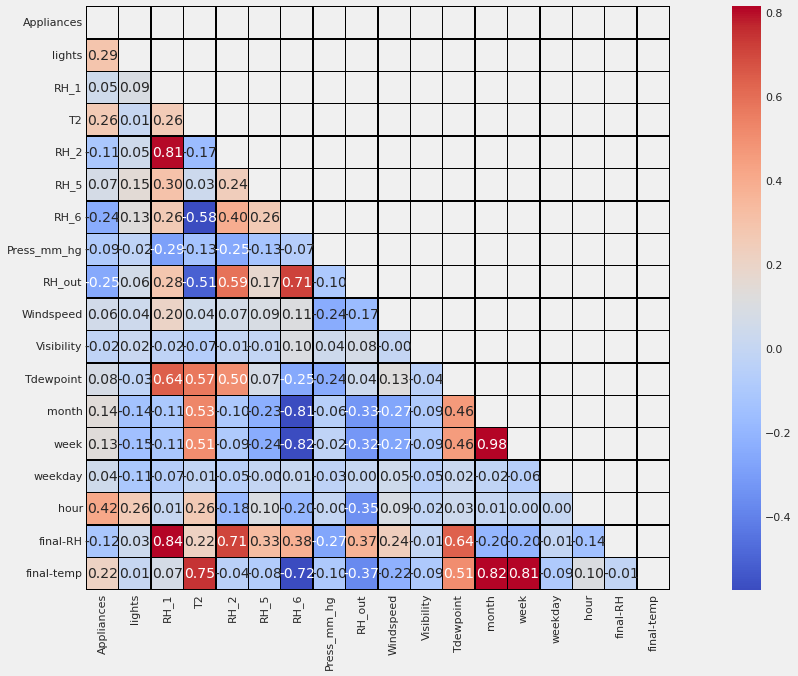

In [ ]:
#Correlation between different variables
corr = dfnew.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20,10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, cbar = True,square = True, fmt = '.2f',mask = mask, cmap='coolwarm',linecolor='black',linewidths=.3,robust=True)

After this step we create a new dataframe for applying the machine learning model.

# Machine Learning Model

### Linear Regressor

In [ ]:
dfnew.columns

Index(['Appliances', 'lights', 'RH_1', 'T2', 'RH_2', 'RH_5', 'RH_6',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
       'month', 'week', 'weekday', 'hour', 'final-RH', 'final-temp'],
      dtype='object')

In [ ]:
# Split the dataset
x= df[['RH_1', 'T2','RH_2', 'RH_5', 'RH_6',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
        'final-RH', 'final-temp','weekday', 'hour']] 
X=x.values
y = df['Appliances'].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:

#Before Applying anytype for ML model, first we have to use standard or normal scaling method

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components = 'mle', svd_solver = 'full')
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred1=reg.predict(X_test)
print('model score is',reg.score(X_train, y_train))
print('Y predicted:',y_pred1)

model score is 0.2526528440125969
Y predicted: [70.05464109 69.00440089 57.54101355 ... 48.34529591 89.75974037
 60.00758595]


In [ ]:
MSE  = mean_squared_error((y_test), (y_pred1))
print("MSE :" , MSE)
MAE=mean_absolute_error((y_test), (y_pred1))
print("MAE :" ,MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test,y_pred1)
print('r2 score for perfect model is', r2)
Adj_r2 =1-(1-r2_score((y_test),(y_pred1)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adj_r2 score for perfect model is', Adj_r2)

MSE : 596.4098186080392
MAE : 18.247542417338504
RMSE : 24.421503201237208
r2 score for perfect model is 0.24650328349513273
Adj_r2 score for perfect model is 0.243709370969587


r2 score for this model is low so we use cv than see the different..

In [ ]:
from sklearn.model_selection import cross_val_score

print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.28123881 0.25560989 0.25107651 0.22387131 0.2678298  0.27912404
 0.25682727 0.22831117 0.22765271 0.23853281]
Accuracy of Test Data : [0.26240579 0.28102963 0.26559055 0.26873074 0.21552987 0.27106748
 0.22497101 0.25711246 0.19671133 0.19619791]
[70.05464109 69.00440089]


In [ ]:
pred= pd.DataFrame({'Actual': np.round(y_test, 0), 
                   'Predicted': np.round(y_pred1, 0)})
pred

,Actual,Predicted
0,130,70.0
1,60,69.0
2,60,58.0
3,50,53.0
4,110,83.0
...,...,...
3515,120,92.0
3516,70,73.0
3517,60,48.0
3518,100,90.0


### Lasso Regressor

In [ ]:
lasso=Lasso(alpha=0.005 , max_iter= 3000).fit(X_train, y_train)

In [ ]:
lasso.score(X_train, y_train)

0.25265164469665136

In [ ]:
y_pred2=lasso.predict(X_test)
y_pred2

array([70.05736453, 69.01470467, 57.52251561, ..., 48.32702247,
       89.74896048, 59.98457094])

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred2))
print("MSE :" , MSE)
MAE=mean_absolute_error((y_test), (y_pred2))
print("MAE :" ,MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test,y_pred2)
print('r2 score for perfect model is', r2)
Adj_r2 =1-(1-r2_score((y_test),(y_pred2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adj_r2 score for perfect model is', Adj_r2)

MSE : 596.4129653099826
MAE : 18.246597156364693
RMSE : 24.421567625973207
r2 score for perfect model is 0.24649930799119535
Adj_r2 score for perfect model is 0.24370538072476222


In [ ]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for lasso model is {}".format(lasso_cv.score(X_train, y_train)))
print("The train score for lasso model is {}".format(lasso_cv.score(X_test, y_test)))

The train score for lasso model is 0.2526480467488148
The train score for lasso model is 0.24649289292899657


In [ ]:
pred= pd.DataFrame({'Actual': np.round(y_test, 0), 
                   'Predicted': np.round(y_pred2, 0)})
pred

,Actual,Predicted
0,130,70.0
1,60,69.0
2,60,58.0
3,50,53.0
4,110,83.0
...,...,...
3515,120,92.0
3516,70,73.0
3517,60,48.0
3518,100,90.0


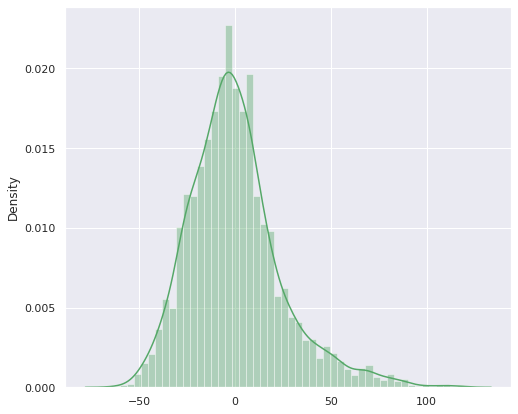

In [ ]:
sns.distplot(y_test-y_pred2,color='g')

### Ridge Regressor

In [ ]:
redg=Ridge(alpha=0.001).fit(X_train, y_train)

In [ ]:
y_pred3=redg.predict(X_test)
print('Ridge Model Score:',redg.score(X_train, y_train))
print('Y predicted value:',y_pred3)

Ridge Model Score: 0.2526528440125885
Y predicted value: [70.05464087 69.0044003  57.54101328 ... 48.34529477 89.75974421
 60.0075854 ]


In [ ]:
MSE  = mean_squared_error((y_test), (y_pred3))
print("MSE :" , MSE)
MAE=mean_absolute_error((y_test), (y_pred3))
print("MAE :" ,MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test,y_pred3)
print('r2 score for perfect model is', r2)
Adj_r2 =1-(1-r2_score((y_test),(y_pred3)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adj_r2 score for perfect model is', Adj_r2)

MSE : 596.4098170913227
MAE : 18.24754225725059
RMSE : 24.421503170184316
r2 score for perfect model is 0.2465032854113336
Adj_r2 score for perfect model is 0.24370937289289296


In [ ]:
#Using the linear CV model
from sklearn.linear_model import LassoCV
#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)

print('For training:',lasso_cv.score(X_train, y_train))
print('For Test:',lasso_cv.score(X_test, y_test))

For training: 0.2526480467488148
For Test: 0.24649289292899657


In [ ]:
from sklearn.model_selection import cross_val_score
print('Accuracy of Train Data :', cross_val_score(reg, X_train,y_train, cv=10 ))
print('Accuracy of Test Data :', cross_val_score(reg, X_test,y_test, cv=10 ))
predicted = reg.predict(X_test[:2])
print(predicted)

Accuracy of Train Data : [0.28123881 0.25560989 0.25107651 0.22387131 0.2678298  0.27912404
 0.25682727 0.22831117 0.22765271 0.23853281]
Accuracy of Test Data : [0.26240579 0.28102963 0.26559055 0.26873074 0.21552987 0.27106748
 0.22497101 0.25711246 0.19671133 0.19619791]
[70.05464109 69.00440089]


In [ ]:
pred= pd.DataFrame({'Actual': np.round(y_test, 0), 
                   'Predicted': np.round(y_pred3, 0)})
pred

,Actual,Predicted
0,130,70.0
1,60,69.0
2,60,58.0
3,50,53.0
4,110,83.0
...,...,...
3515,120,92.0
3516,70,73.0
3517,60,48.0
3518,100,90.0


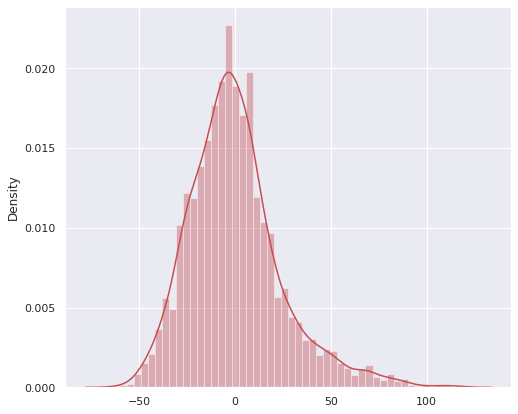

In [ ]:
sns.distplot(y_test-y_pred3,color="r")

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)

In [ ]:
regressor.fit(X_train, y_train)
y_pred_train4 = regressor.predict(X_train)
y_pred4 = regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred4))
print("MSE :" , MSE)
MAE=mean_absolute_error((y_test), (y_pred4))
print("MAE :" ,MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test,y_pred4)
print('r2 score for perfect model is', r2)
Adj_r2 =1-(1-r2_score((y_test),(y_pred4)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adj_r2 score for perfect model is', Adj_r2)

MSE : 265.40448579545455
MAE : 10.964346590909091
RMSE : 16.291239541405513
r2 score for perfect model is 0.6646912871768706
Adj_r2 score for perfect model is 0.6634479861880798


In Random Forest Regressor the r2 score is pretty good, may this is perfect model for this dataframe  

In [ ]:

#this table give the actual and predicted value of the model

pred= pd.DataFrame({'Actual': np.round(y_test, 0), 
                   'Predicted': np.round(y_pred4, 0)})
pred

,Actual,Predicted
0,130,69.0
1,60,70.0
2,60,41.0
3,50,51.0
4,110,104.0
...,...,...
3515,120,92.0
3516,70,77.0
3517,60,55.0
3518,100,76.0


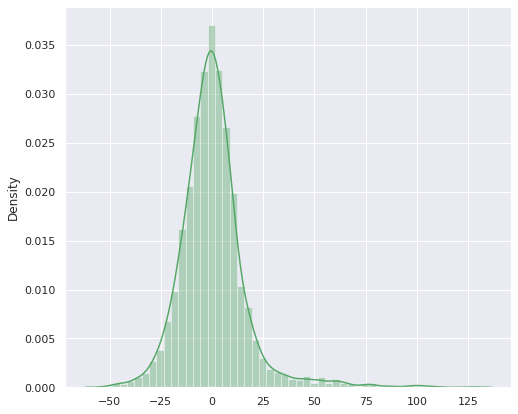

In [ ]:
sns.distplot(y_test-y_pred4,color='g')

### Elasicnet Regression

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(n_features=2, random_state=0)
model = ElasticNet(random_state=0,l1_ratio=0.5)

In [ ]:
net = model.fit(X_train, y_train)

In [ ]:
net.fit(X_train, y_train)
y_pred_train5 = net.predict(X_train)
y_pred5 = net.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred5))
print("MSE :" , MSE)
MAE=mean_absolute_error((y_test), (y_pred5))
print("MAE :" ,MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(y_test,y_pred5)
print('r2 score for perfect model is', r2)
Adj_r2 =1-(1-r2_score((y_test),(y_pred5)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adj_r2 score for perfect model is', Adj_r2)

MSE : 628.3536419891232
MAE : 18.82562722575333
RMSE : 25.066983105055208
r2 score for perfect model is 0.2061458559691507
Adj_r2 score for perfect model is 0.20320230095705683


# Additional Model

This code is use to find the importance of each and every column of dataframe...

In [ ]:
# Saving feature names for later use
factor_list = list(x.columns)
# Convert to numpy array
factors = np.array(x)
#Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
factor_importances = [(factor, round(importance, 2)) 
    for factor, importance in zip(factor_list, importances)]
# Sort the feature importances by most important first
factor_importances = sorted(factor_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in factor_importances];

Variable: T2                   Importance: 0.16
Variable: RH_2                 Importance: 0.1
Variable: Windspeed            Importance: 0.1
Variable: RH_1                 Importance: 0.08
Variable: RH_6                 Importance: 0.07
Variable: Visibility           Importance: 0.07
Variable: final-temp           Importance: 0.07
Variable: RH_5                 Importance: 0.06
Variable: Press_mm_hg          Importance: 0.06
Variable: RH_out               Importance: 0.06
Variable: Tdewpoint            Importance: 0.06
Variable: final-RH             Importance: 0.06
Variable: weekday              Importance: 0.05


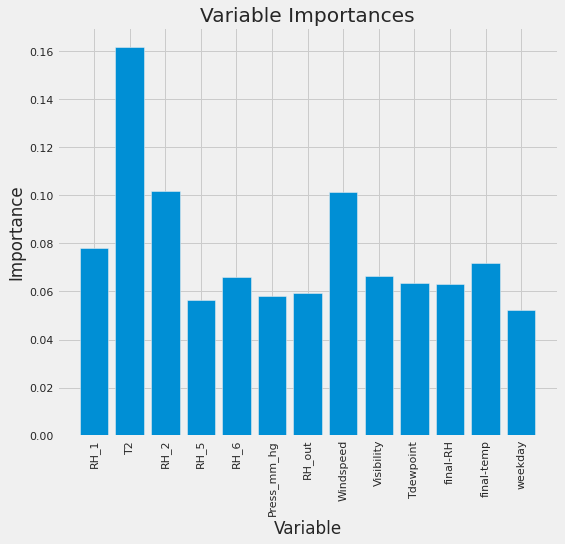

In [ ]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, factor_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); 
plt.title('Variable Importances');

### Now we create a new dataframe that contain the test, train R2 score, rmse,maxerror for rest of each M.L. model

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [ ]:
models = [
           ['ElasticNet: ', ElasticNet()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [ ]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data['Model Score']= curr_model.score(X_test,y_test)
    curr_model_data['explained_variance']=metrics.explained_variance_score(y_train,curr_model.predict(X_train))
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data['max error']= metrics.max_error(y_test,curr_model.predict(X_test))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[18:30:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
df1 = pd.DataFrame(model_data)
df1

,Name,Train_Time,Model Score,explained_variance,Train_R2_Score,max error,Test_R2_Score,Test_RMSE_Score
0,ElasticNet:,0.005875,0.206146,0.207644,0.207644,112.871525,0.206146,25.066983
1,KNeighborsRegressor:,0.037497,0.645924,0.787976,0.787512,128.000000,0.645924,16.740941
2,SVR:,14.514152,0.326381,0.351317,0.334357,118.414915,0.326381,23.090796
3,RandomForest,16.962859,0.661705,0.955074,0.955057,126.500000,0.661705,16.363617
4,ExtraTreeRegressor :,4.513595,0.684706,1.000000,1.000000,123.000000,0.684706,15.797556
5,GradientBoostingRegressor:,6.783051,0.386790,0.430716,0.430716,118.415014,0.386790,22.031114
6,XGBRegressor:,1.578637,0.385683,0.428404,0.428404,120.148842,0.385683,22.050992
7,MLPRegressor:,27.243185,0.534984,0.613512,0.612444,114.649529,0.534984,19.185180


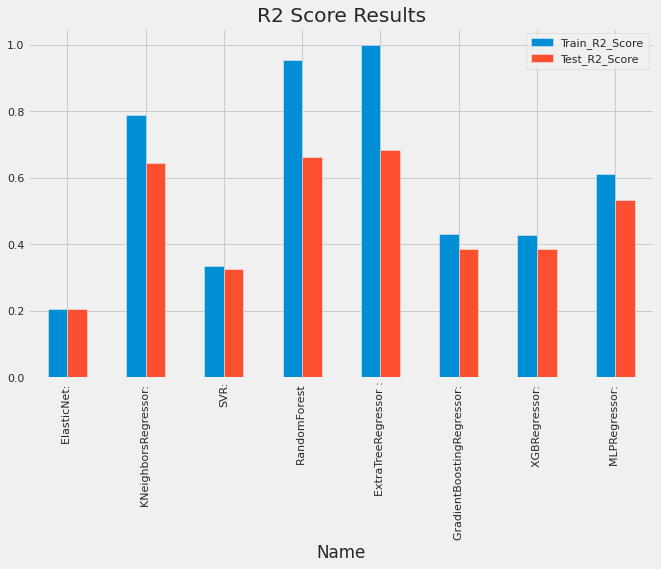

In [ ]:
df1.plot(x="Name", y=['Train_R2_Score' ,'Test_R2_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,6))

we can see that randomForest and ExtraTreeRegreesor have pretty good r2 score for the test data...

# hypertunning

In this portion we try to improve the accuracy of the M.L. model by the RandomSearchCV

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.5 MB/s 


In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
lr_bayes = BayesSearchCV(estimator=lasso,
                       search_spaces = {'alpha' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................alpha=0.11906429260239439; total time=   0.0s
[CV] END ..........................alpha=0.11906429260239439; total time=   0.0s
[CV] END ..........................alpha=0.11906429260239439; total time=   0.0s
[CV] END ..........................alpha=0.11906429260239439; total time=   0.0s
[CV] END ..........................alpha=0.11906429260239439; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................alpha=34879.38955561932; total time=   0.0s
[CV] END ............................alpha=34879.38955561932; total time=   0.0s
[CV] END ............................alpha=34879.38955561932; total time=   0.0s
[CV] END ............................alpha=34879.38955561932; total time=   0.0s
[CV] END ............................alpha=34879.38955561932; total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

BayesSearchCV(cv=5, estimator=Lasso(alpha=0.005, max_iter=3000), n_iter=10,
              scoring='r2',
              search_spaces={'alpha': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='normalize')},
              verbose=2)

In [ ]:
lr_bayes.best_estimator_

Lasso(alpha=3.8356593976619046e-05, max_iter=3000)

In [ ]:
#r2 of test and train
print('Train R2 square : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train R2 square :  0.25265284394201826
Test R2 score :  0.2465032622833062


In [ ]:
lr_bayesRandom = BayesSearchCV(estimator=regressor,
                         search_spaces = {
                          'max_depth':Integer(4,40) ,
                          'min_samples_leaf': Integer(3,20),
                          'min_samples_split': Integer(3,20),
                          'n_estimators': Integer(10,200),
                          'max_features': ["auto", "sqrt", "log2"],
                          'bootstrap' : [True, False]

                        },
                       cv = 5, verbose=2, scoring='r2', n_iter=10)

lr_bayesRandom.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, max_depth=18, max_features=log2, min_samples_leaf=17, min_samples_split=5, n_estimators=163; total time=   4.5s
[CV] END bootstrap=True, max_depth=18, max_features=log2, min_samples_leaf=17, min_samples_split=5, n_estimators=163; total time=   6.8s
[CV] END bootstrap=True, max_depth=18, max_features=log2, min_samples_leaf=17, min_samples_split=5, n_estimators=163; total time=   9.6s
[CV] END bootstrap=True, max_depth=18, max_features=log2, min_samples_leaf=17, min_samples_split=5, n_estimators=163; total time=   7.6s
[CV] END bootstrap=True, max_depth=18, max_features=log2, min_samples_leaf=17, min_samples_split=5, n_estimators=163; total time=   8.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, max_depth=21, max_features=auto, min_samples_leaf=9, min_samples_split=14, n_estimators=146; total time=  26.9s
[CV] END bootstrap=False, max_depth=21, max_features=auto, 

BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=10, scoring='r2',
              search_spaces={'bootstrap': [True, False],
                             'max_depth': Integer(low=4, high=40, prior='uniform', transform='normalize'),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')},
              verbose=2)

In [ ]:
lr_bayesRandom.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=14, max_features='log2',
                      min_samples_leaf=4, min_samples_split=8,
                      n_estimators=115)

In [ ]:
#r2 of test and train
print('Train R2 square : ', lr_bayesRandom.best_estimator_.score(X_train,y_train))
print('Test R2 score : ', lr_bayesRandom.best_estimator_.score(X_test,y_test))

Train R2 square :  0.8183574746262177
Test R2 score :  0.6129806842857113


atlast we receive that 0.8183 r2_score for training data and 0.61 for the taste data

# Conclusion

1) Main aim of the project is to predict energy consumption of Appliances. First we analysed the data but the information from the data set is collected in regular interval of time so it's time series data. We are not implementing time series technique on the model because of less knowledge on time series.

2) Then we used the matplotlib and seaborn to do Exploratory Data Analysis on data by plotting different graphs like scatter-plot, barplot, boxplot, subplot and heat map. From this we got useful insights like:

Many columns in the dataset are not normally distributed and target column is also right skewed.

Dataset has many outliers and no null values.

We have hours column which is highly correlated with dependent variable and there are lot features that have lesser than 0.1 correlation with dependent variable and it is a non linear dataset.

Energy consumption in month of March is high and low in January and the increase in temp leads to more energy consumption.

Decrease in Humidity leads to increase in power consumption. Humidity is inversely proportional to dependent variable i.e Energy Consumption.

Hour of the Day is the most important influencing parameter for Energy consumption.

High Electricity consumption of >140Wh is observed during evening hours 16:00 to 20:00. Weekends (Saturdays and Sundays) also observed high consumption of Electricity. (> 25% than Weekdays)

lights have very low importance as a feature.

1.The best Model is score is for
1.   ExtraTreeRegressor=0.67
2.   RandomForest=0.654

2 best R2 for data is 0.654362

3.The model is not suitable, it get very less acuracy.

4.Uses of appliances are based on temperature, humidity and weather condition.

# Thank You